# Credit EDA Assignment

# Problem Statement:
            Loan providers struggle to lend to individuals with insufficient or non-existent credit histories, leading some consumers to default. Working for a consumer finance company specializing in various urban loans, your task is to use EDA to analyze data patterns. This analysis will help ensure that capable applicants are approved, reducing the risk of default and improving loan approval accuracy.
            
            Upon receiving a loan application, the company must determine loan approval by evaluating the applicant's profile. Approval of loans entails two risks for banks: 
   - Denying loans to reliable applicants results in lost business opportunities.
   - Granting loans to unreliable applicants increases the likelihood of financial losses due to default
     
            Data provided delineates loan application scenarios into two categories:
   - Clients experiencing payment difficulties: Individuals with late payments exceeding X days on at least one of the initial Y loan installments.
   - All other cases: Instances where payments are made punctually without such challenge
     
            In the context of loan applications, four potential outcomes can occur:    
- Approval: The company sanctions the loan.    
- Cancellation: The client withdraws the application, possibly due to altered preferences or unfavorable terms    .
- Refusal: The company denies the loan, often due to client inadequacie    s.
- Unused Offer: The client cancels the loan at various stages. This case study employs Exploratory Data Analysis (EDA) to discern the impact of consumer and loan attributes on default tendencies.
ies.

# Exploration and Analysis of the Application data:
First, we need to import the necessary datasets and warnings.

In [1]:
# Import the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

In [2]:
#Import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading data for application_data.csv
ad0 = pd.read_csv('application_data.csv')
ad0.head()

NameError: name 'pd' is not defined

In [4]:
#Checking for columns in application_data.csv
ad1 = ad0.columns.values
ad1

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

The above are the total columns which are persent in the database.

Now, Considering less than 50% of the data having null values, and droping the all other columns having more than 50% of the null value.

In [5]:
#Checking for 50% and No of columns to be droped.
addrop = ad0.isnull().sum()/len(ad0)*100
addrop = addrop[addrop.values>50]
print(addrop)
len(addrop)

OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
APARTMENTS_M

41

The above are the columns to be droped in main dataset.

In [6]:
#Columns droped from main dataset.
addrop = list(addrop[addrop.values>=50].index)
ad0.drop(labels=addrop,axis=1,inplace=True)
print(len(addrop))

41


In total we need to drop 41 columns

In [7]:
#checking for the shape of updated dataset.
ad0.shape

(307511, 81)

In [8]:
#Analysing for the updated dataset.
ad0

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

In [9]:
#Creating a list for the numerical columns.
adnum = list(ad0.describe().columns)
adnum

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'F

The above are the Numerical columns list

In [10]:
#Creating a list for the all columns.
adallcol = list(ad0.columns)
adallcol

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE'

The above are the All columns list

In [11]:
#Creating a list for the categorical columns.
adcat = list(set(adallcol) - set(adnum))
adcat

['OCCUPATION_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_HOUSING_TYPE',
 'FLAG_OWN_CAR',
 'WEEKDAY_APPR_PROCESS_START',
 'EMERGENCYSTATE_MODE',
 'ORGANIZATION_TYPE',
 'CODE_GENDER',
 'NAME_FAMILY_STATUS',
 'NAME_INCOME_TYPE',
 'FLAG_OWN_REALTY']

The above are the Categorical columns list

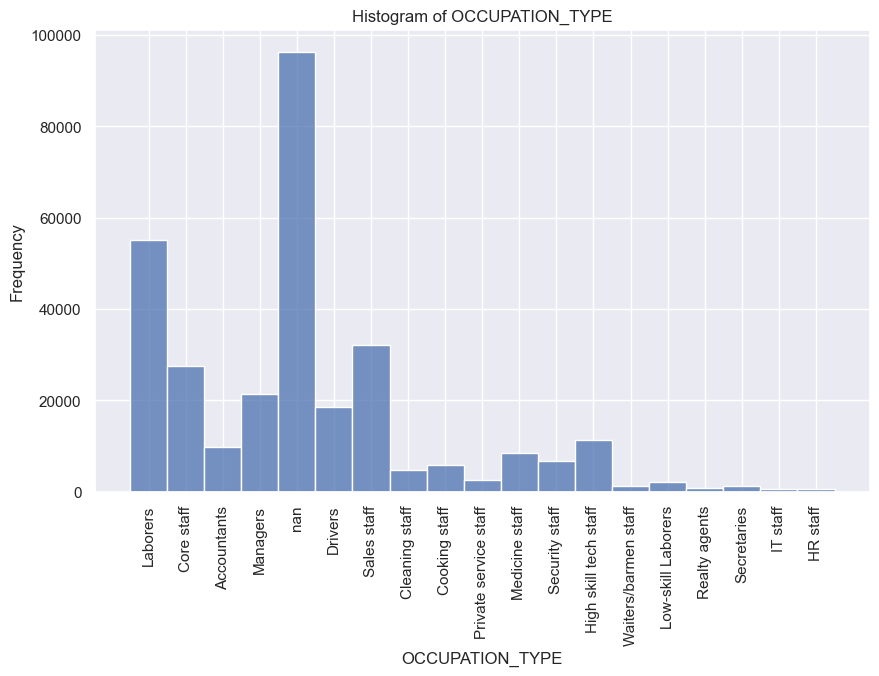

*******************************************************************


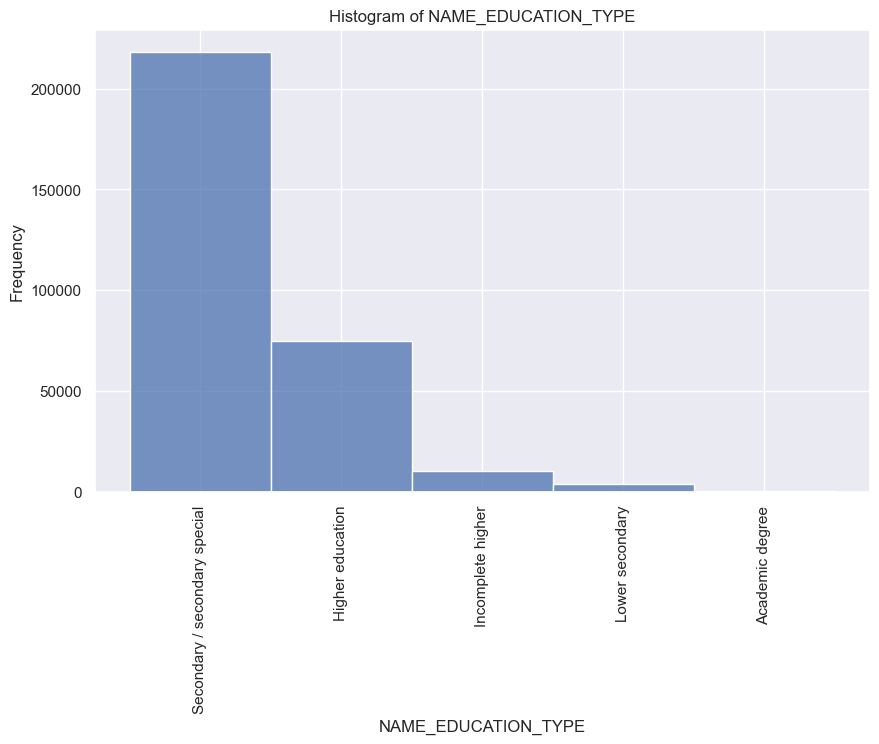

*******************************************************************


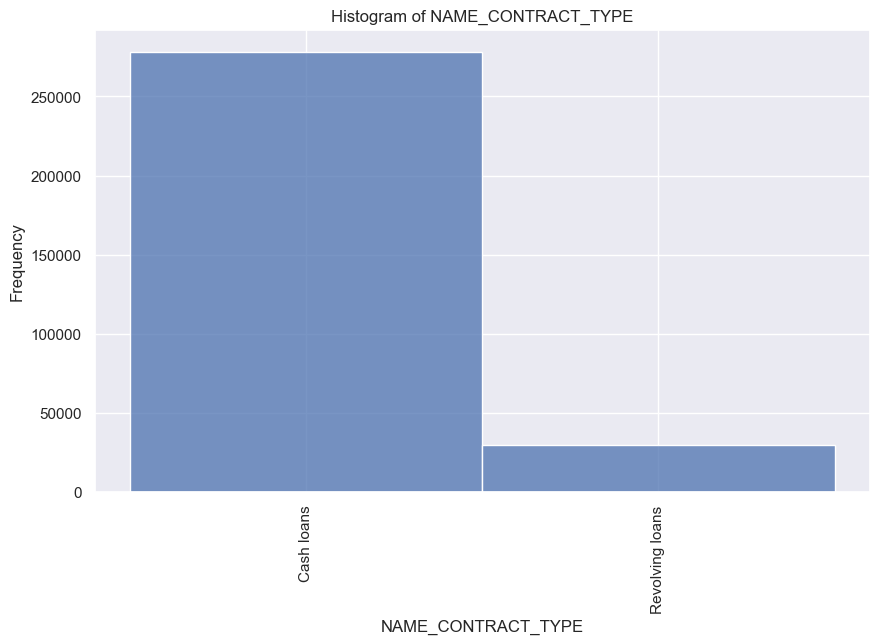

*******************************************************************


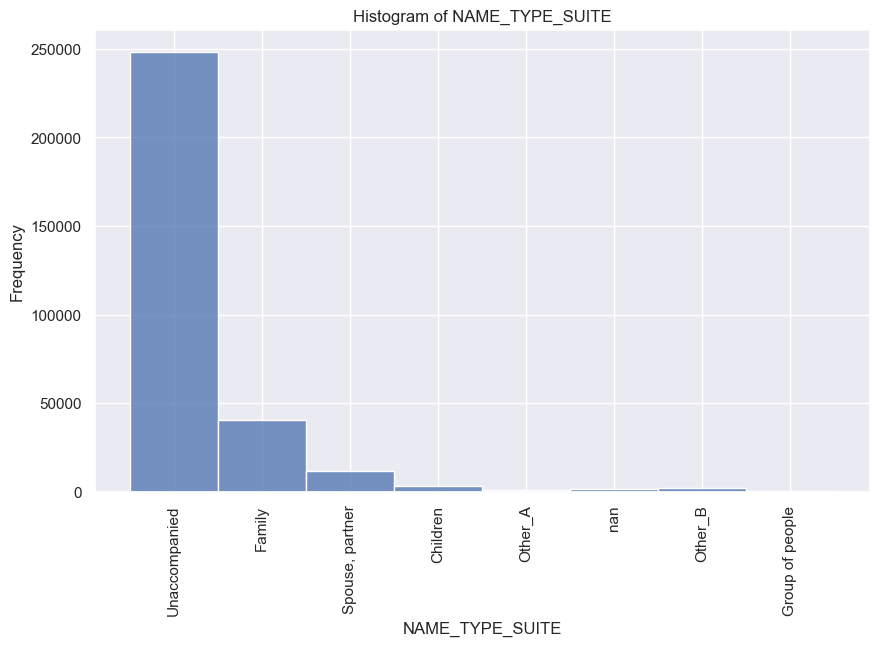

*******************************************************************


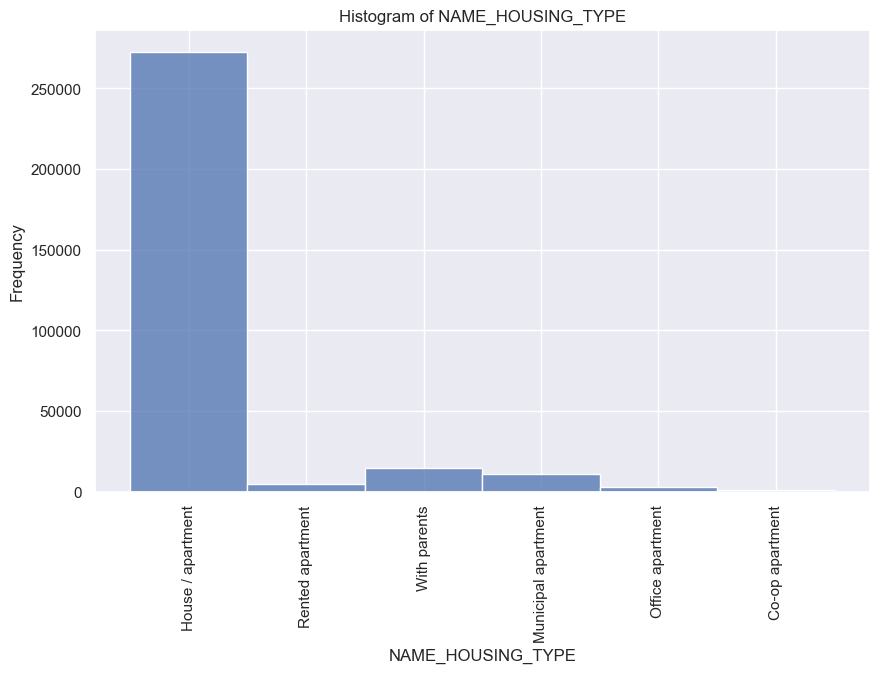

*******************************************************************


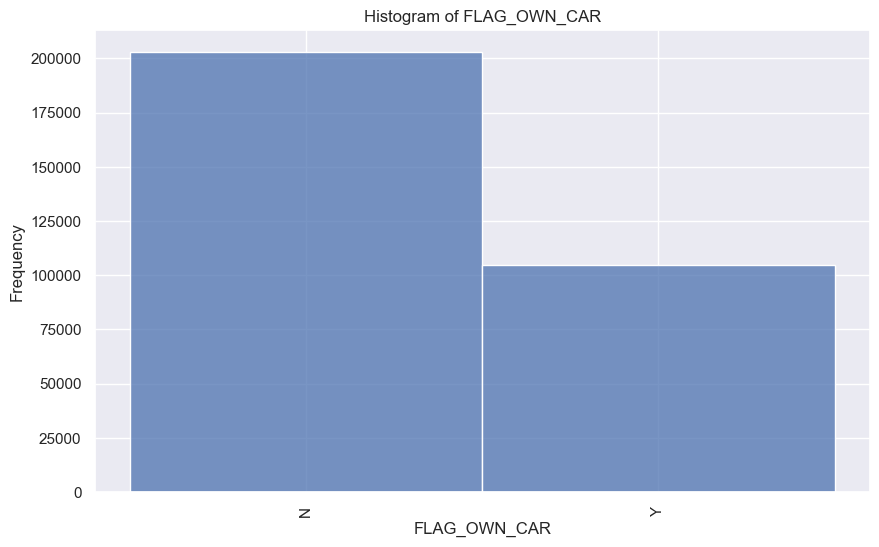

*******************************************************************


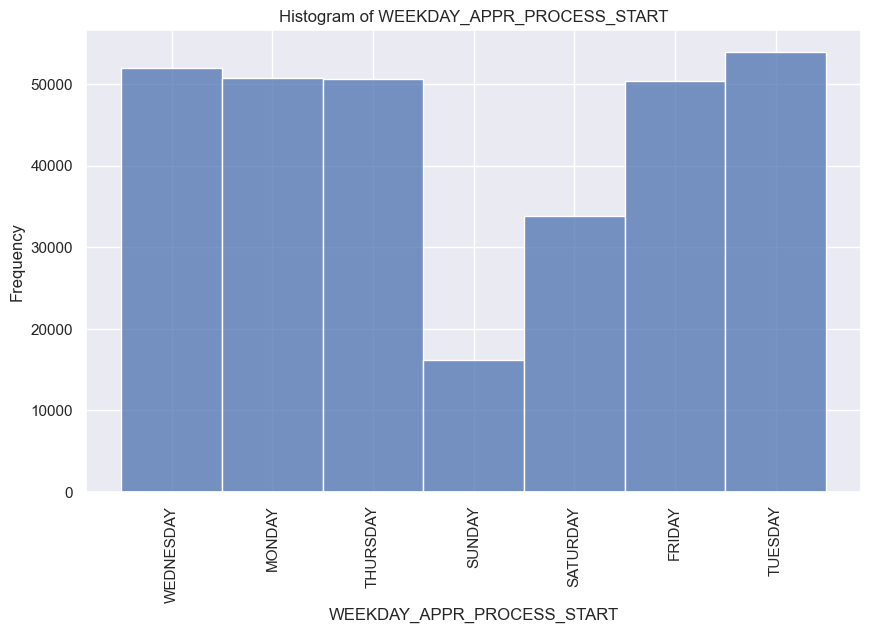

*******************************************************************


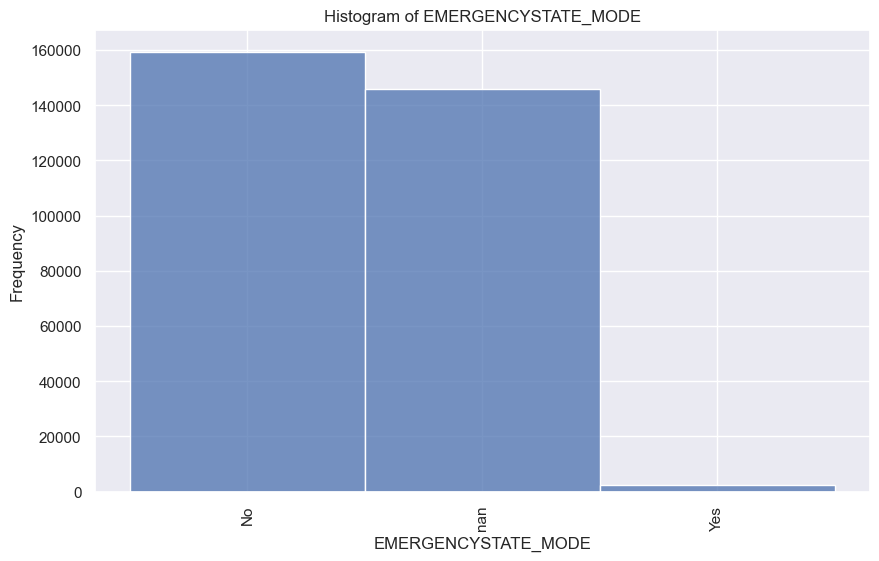

*******************************************************************


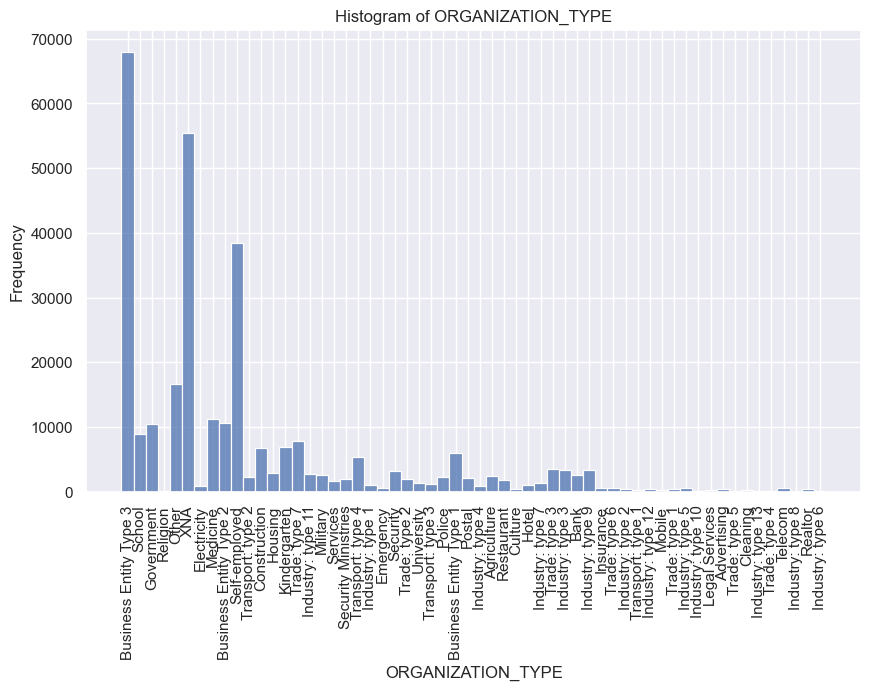

*******************************************************************


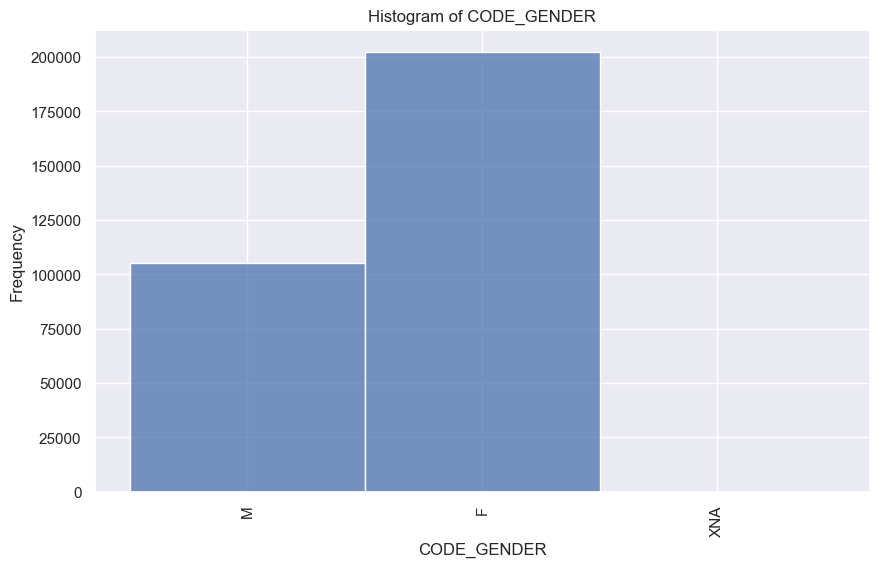

*******************************************************************


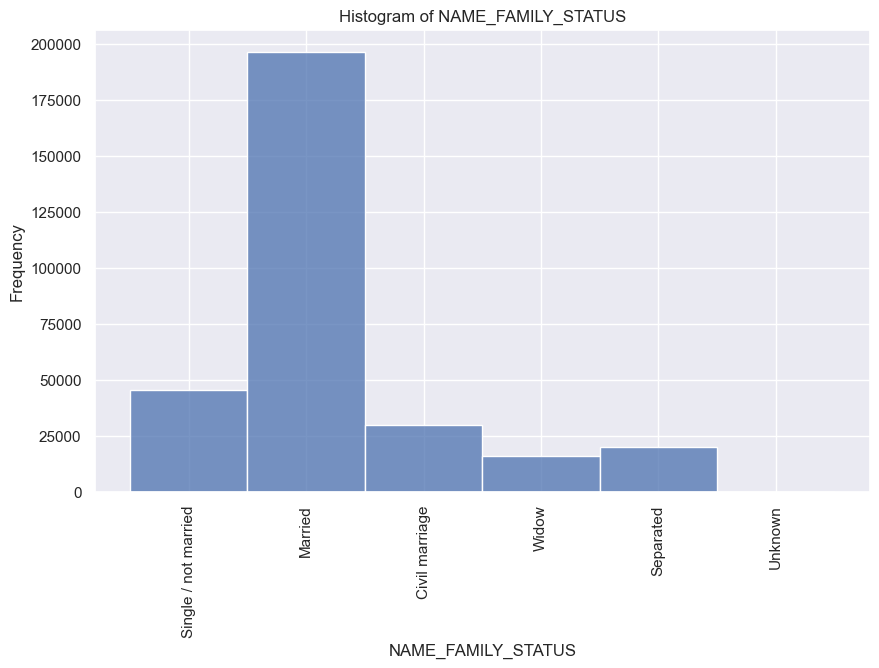

*******************************************************************


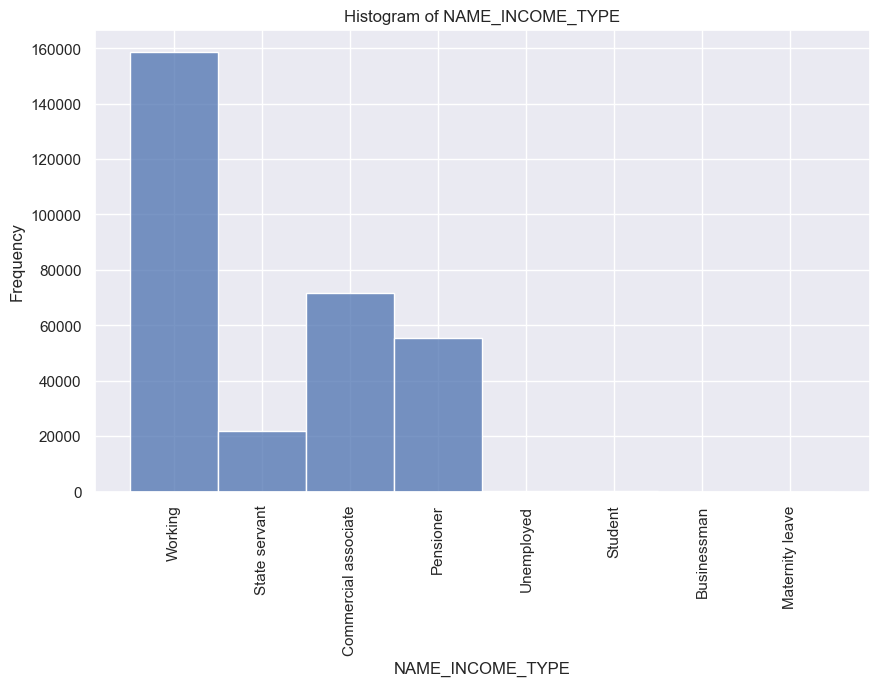

*******************************************************************


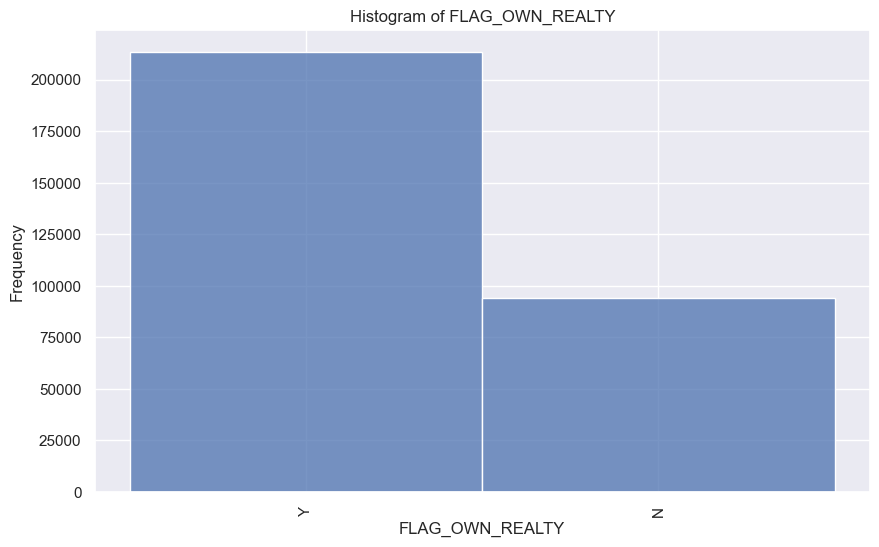

*******************************************************************


In [12]:
# Graphs for categorical columns.
plt.ion()
for column in adcat:
    plt.figure(figsize=(10, 6))
    sns.histplot(ad0[column].astype(str), kde=False, bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.savefig(f'Histogram of {column}', dpi = 900, transparent = False, bbox_inches = 'tight', pad_inches = 'layout')
    plt.show()
    print("*******************************************************************")

In [13]:
#Checking for greater than zero in upadted dataset. 
adnull = ad0.isnull().sum()
adnull[adnull>0]

AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      2
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
YEARS_BEGINEXPLUATATION_AVG     150007
FLOORSMAX_AVG                   153020
YEARS_BEGINEXPLUATATION_MODE    150007
FLOORSMAX_MODE                  153020
YEARS_BEGINEXPLUATATION_MEDI    150007
FLOORSMAX_MEDI                  153020
TOTALAREA_MODE                  148431
EMERGENCYSTATE_MODE             145755
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
DAYS_LAST_PHONE_CHANGE               1
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_YEA

Here, we won't get the values having greater than in percentage, where it is easy to analysis the missing values in percentage. So next two steps we are going to convert in percentage and then analysis for missing values.

In [14]:
#calculating for the no of missig values.
admissing = ad0.count()/len(ad0)
admissing

SK_ID_CURR                    1.000000
TARGET                        1.000000
NAME_CONTRACT_TYPE            1.000000
CODE_GENDER                   1.000000
FLAG_OWN_CAR                  1.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.864984
AMT_REQ_CREDIT_BUREAU_WEEK    0.864984
AMT_REQ_CREDIT_BUREAU_MON     0.864984
AMT_REQ_CREDIT_BUREAU_QRT     0.864984
AMT_REQ_CREDIT_BUREAU_YEAR    0.864984
Length: 81, dtype: float64

In [15]:
#Coverting it into percentage.
admissing = (1-admissing)*100
admissing 

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

In [16]:
#Getting sorted. 
admissing.sort_values(ascending=False).head(60)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

# Treating for missing values

Many columns have significant missing values, especially those with over 50% missing data, often representing mean, median, or mode. We'll exclude these from our analysis and focus on columns with fewer missing values.

1 .OCCUPATION_TYPE

In [17]:
#Checking for the FLOORSMAX_AVG column.
print(ad0['OCCUPATION_TYPE'].head())

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object


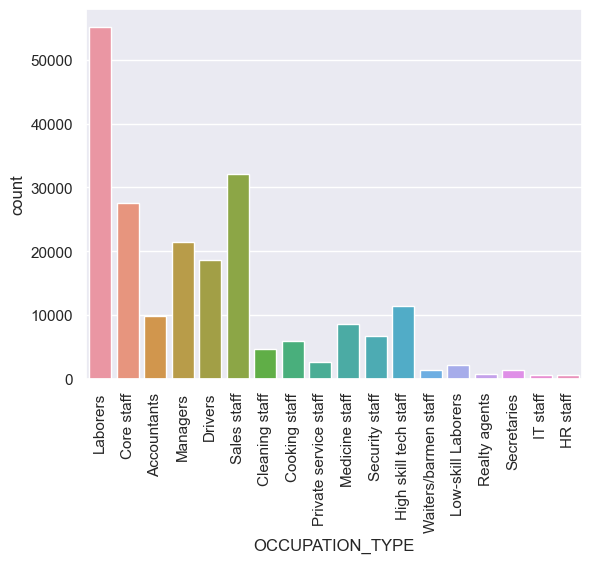

In [18]:
sns.countplot(x=ad0['OCCUPATION_TYPE'])
plt.xticks(rotation=90)
plt.savefig('OCCUPATION_TYPE', dpi = 900, transparent = False, bbox_inches = 'tight', pad_inches = 'layout')
plt.show()

Since the most common occupation type is "labourers," filling the 31% missing values with "labourers" wouldn't be meaningful. Therefore, we will leave the missing values in this column untreated and proceed without any imputation for this specific variable.

    2. FLOORSMAX_AVG

In [19]:
#Checking for the FLOORSMAX_AVG column.
print(ad0['FLOORSMAX_AVG'].describe())
print('****************************')
print(ad0['FLOORSMAX_AVG'].mean())
print('****************************')
print(ad0['FLOORSMAX_AVG'].mode())

count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64
****************************
0.22628190703665588
****************************
0    0.1667
Name: FLOORSMAX_AVG, dtype: float64


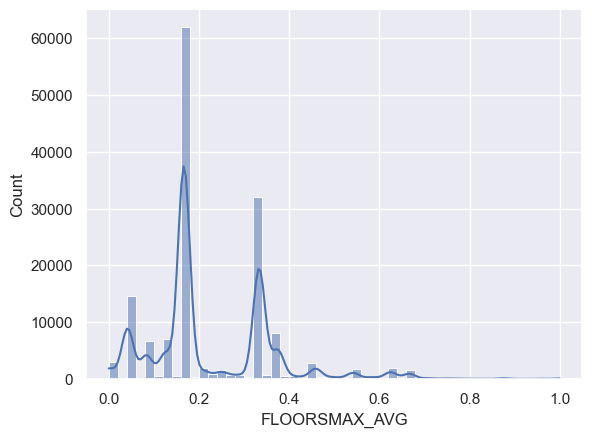

In [20]:
#checking through histogram.
sns.histplot(ad0['FLOORSMAX_AVG'], kde=True, bins=50)
plt.savefig('FLOORSMAX_AVG', dpi = 900, transparent = False, bbox_inches = 'tight', pad_inches = 'layout')
plt.show()

Here, in this column we have mean as 0.226 and median as 0.166, but the min and max values are 0 and 1 respectively. So comparing the both mean and median we can replace the null vaules by mean value.

In [21]:
#Filling the missing value with mean value.
ad0 = ad0.fillna(value=ad0['FLOORSMAX_AVG'].mean())
ad0

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                   0.000000                  0.000000   
1                     0                   0.000000                  0.000000   
2                     0                   0.000000                  0.000000   
3                     0                   0.226282                  0.226282   
4                     0                   0.000000                  0.000000   
...                 ...                        ...                       ...   
307506                0                   0.226282                  0.226282   
307507                0                   0.226282                  0.226282   
307508                0                   1.000000                  0.000000   
307509                0                   0.000000                  0.000000   
307510                0                   0.000000                  0.000000   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.000000                   0.000000   
1                         0.000000                   0.000000   
2                         0.000000                   0.000000   
3                         0.226282                   0.226282   
4                         0.000

In [22]:
#Checking for the missing value for the same column.
ad0['FLOORSMAX_AVG'].isna().sum()

0

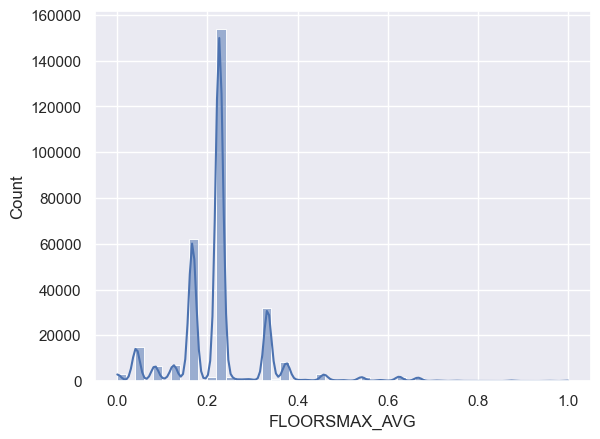

In [23]:
#Checking for the missing value for the same column using histogram. 
sns.histplot(ad0['FLOORSMAX_AVG'], kde=True, bins=50)
plt.savefig('FLOORSMAX_AVG1', dpi = 900, transparent = False, bbox_inches = 'tight', pad_inches = 'layout')
plt.show()

Now this column has '0' missing value as we see that we have filled the missing value with mean of that column.

    3. FLOORSMAX_MODE

In [24]:
#Checking for the FLOORSMAX_MODE column.
print(ad0['FLOORSMAX_MODE'].describe())
print('****************************')
print(ad0['FLOORSMAX_MODE'].mean())
print('****************************')
print(ad0['FLOORSMAX_MODE'].mode())

count    307511.000000
mean          0.224289
std           0.101880
min           0.000000
25%           0.166700
50%           0.226282
75%           0.226282
max           1.000000
Name: FLOORSMAX_MODE, dtype: float64
****************************
0.2242889893849296
****************************
0    0.226282
Name: FLOORSMAX_MODE, dtype: float64


Here, in this column we can see that there is bit difference between mean and median with value of 0.001993, thus we can replace the missing value with either mean or median, considering the difference between mean and median I choose mean value for replacing the missing value.

In [25]:
#Filling the missing value with mean value.
ad0 = ad0.fillna(value=ad0['FLOORSMAX_MODE'].mean())
ad0

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                   0.000000                  0.000000   
1                     0                   0.000000                  0.000000   
2                     0                   0.000000                  0.000000   
3                     0                   0.226282                  0.226282   
4                     0                   0.000000                  0.000000   
...                 ...                        ...                       ...   
307506                0                   0.226282                  0.226282   
307507                0                   0.226282                  0.226282   
307508                0                   1.000000                  0.000000   
307509                0                   0.000000                  0.000000   
307510                0                   0.000000                  0.000000   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.000000                   0.000000   
1                         0.000000                   0.000000   
2                         0.000000                   0.000000   
3                         0.226282                   0.226282   
4                         0.000

In [26]:
#Checking for the missing value for the same column.
ad0['FLOORSMAX_MODE'].isna().sum()

0

Now this column has '0' missing value as we see that we have filled the missing value with mean of that column.


    4.FLOORSMAX_MEDI

In [27]:
#Checking for the FLOORSMAX_MEDI column.
print(ad0['FLOORSMAX_MEDI'].describe())
print('****************************')
print(ad0['FLOORSMAX_MEDI'].mean())
print('****************************')
print(ad0['FLOORSMAX_MEDI'].mode())

count    307511.000000
mean          0.226088
std           0.102823
min           0.000000
25%           0.166700
50%           0.226282
75%           0.226282
max           1.000000
Name: FLOORSMAX_MEDI, dtype: float64
****************************
0.22608832696960138
****************************
0    0.226282
Name: FLOORSMAX_MEDI, dtype: float64


Here, in this column there is no difference between mean and median, hence I choose to replace the missing value with mean value.

In [28]:
#Filling the missing value with mean value.
ad0 = ad0.fillna(value=ad0['FLOORSMAX_MEDI'].mean())
ad0

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                   0.000000                  0.000000   
1                     0                   0.000000                  0.000000   
2                     0                   0.000000                  0.000000   
3                     0                   0.226282                  0.226282   
4                     0                   0.000000                  0.000000   
...                 ...                        ...                       ...   
307506                0                   0.226282                  0.226282   
307507                0                   0.226282                  0.226282   
307508                0                   1.000000                  0.000000   
307509                0                   0.000000                  0.000000   
307510                0                   0.000000                  0.000000   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.000000                   0.000000   
1                         0.000000                   0.000000   
2                         0.000000                   0.000000   
3                         0.226282                   0.226282   
4                         0.000

In [29]:
#Checking for the missing value for the same column.
ad0['FLOORSMAX_MEDI'].isna().sum()

0

Now this column has '0' missing value as we see that we have filled the missing value with mean of that column.

    5. YEARS_BEGINEXPLUATATION_AVG 

In [30]:
#Checking for the YEARS_BEGINEXPLUATATION_AVG column.
print(ad0['YEARS_BEGINEXPLUATATION_AVG'].describe())
print('****************************')
print(ad0['YEARS_BEGINEXPLUATATION_AVG'].mean())
print('****************************')
print(ad0['YEARS_BEGINEXPLUATATION_AVG'].mode())
print('****************************')
print(ad0['YEARS_BEGINEXPLUATATION_AVG'].median())

count    307511.000000
mean          0.611168
std           0.377999
min           0.000000
25%           0.226282
50%           0.959300
75%           0.982100
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64
****************************
0.6111684496777275
****************************
0    0.226282
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64
****************************
0.9593


Here, in this column we can observe that the values are not normally distributed and can see the huge difference between the values, thus its better to repalce the missing value with median.

In [31]:
#Filling the missing value with median value.
ad0 = ad0.fillna(value=ad0['YEARS_BEGINEXPLUATATION_AVG'].median())
ad0

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                   0.000000                  0.000000   
1                     0                   0.000000                  0.000000   
2                     0                   0.000000                  0.000000   
3                     0                   0.226282                  0.226282   
4                     0                   0.000000                  0.000000   
...                 ...                        ...                       ...   
307506                0                   0.226282                  0.226282   
307507                0                   0.226282                  0.226282   
307508                0                   1.000000                  0.000000   
307509                0                   0.000000                  0.000000   
307510                0                   0.000000                  0.000000   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.000000                   0.000000   
1                         0.000000                   0.000000   
2                         0.000000                   0.000000   
3                         0.226282                   0.226282   
4                         0.000

In [32]:
#Checking for the missing value for the same column.
ad0['YEARS_BEGINEXPLUATATION_AVG'].isna().sum()

0

Now this column has '0' missing value as we see that we have filled the missing value with median of that column

    6. YEARS_BEGINEXPLUATATION_MODE

In [33]:
#Checking for the YEARS_BEGINEXPLUATATION_MODE column.
print(ad0['YEARS_BEGINEXPLUATATION_MODE'].describe())
print('****************************')
print(ad0['YEARS_BEGINEXPLUATATION_MODE'].mean())
print('****************************')
print(ad0['YEARS_BEGINEXPLUATATION_MODE'].mode())
print('****************************')
print(ad0['YEARS_BEGINEXPLUATATION_MODE'].median())

count    307511.000000
mean          0.610826
std           0.378116
min           0.000000
25%           0.226282
50%           0.958800
75%           0.981600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64
****************************
0.6108255461718366
****************************
0    0.226282
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64
****************************
0.9588


Here, in this column we can observe that the values are not normally distributed and can see the huge difference between the values, thus its better to repalce the missing value with median.

In [34]:
#Filling the missing value with median value.
ad0 = ad0.fillna(value=ad0['YEARS_BEGINEXPLUATATION_MODE'].median())
ad0

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                   0.000000                  0.000000   
1                     0                   0.000000                  0.000000   
2                     0                   0.000000                  0.000000   
3                     0                   0.226282                  0.226282   
4                     0                   0.000000                  0.000000   
...                 ...                        ...                       ...   
307506                0                   0.226282                  0.226282   
307507                0                   0.226282                  0.226282   
307508                0                   1.000000                  0.000000   
307509                0                   0.000000                  0.000000   
307510                0                   0.000000                  0.000000   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.000000                   0.000000   
1                         0.000000                   0.000000   
2                         0.000000                   0.000000   
3                         0.226282                   0.226282   
4                         0.000

In [35]:
#Checking for the missing value for the same column.
ad0['YEARS_BEGINEXPLUATATION_MODE'].isna().sum()

0

Now this column has '0' missing value as we see that we have filled the missing value with median of that column

    7. YEARS_BEGINEXPLUATATION_MEDI

In [36]:
#Checking for the YEARS_BEGINEXPLUATATION_MEDI column.
print(ad0['YEARS_BEGINEXPLUATATION_MEDI'].describe())
print('****************************')
print(ad0['YEARS_BEGINEXPLUATATION_MEDI'].mean())
print('****************************')
print(ad0['YEARS_BEGINEXPLUATATION_MEDI'].mode())
print('****************************')
print(ad0['YEARS_BEGINEXPLUATATION_MEDI'].median())

count    307511.000000
mean          0.611177
std           0.378062
min           0.000000
25%           0.226282
50%           0.959300
75%           0.982100
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64
****************************
0.6111773648059666
****************************
0    0.226282
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64
****************************
0.9593


Here, in this column we can observe that the values are not normally distributed and can see the huge difference between the values, so its better to repalce the missing value with median.

In [37]:
#Filling the missing value with median value.
ad0 = ad0.fillna(value=ad0['YEARS_BEGINEXPLUATATION_MODE'].median())
ad0

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                   0.000000                  0.000000   
1                     0                   0.000000                  0.000000   
2                     0                   0.000000                  0.000000   
3                     0                   0.226282                  0.226282   
4                     0                   0.000000                  0.000000   
...                 ...                        ...                       ...   
307506                0                   0.226282                  0.226282   
307507                0                   0.226282                  0.226282   
307508                0                   1.000000                  0.000000   
307509                0                   0.000000                  0.000000   
307510                0                   0.000000                  0.000000   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.000000                   0.000000   
1                         0.000000                   0.000000   
2                         0.000000                   0.000000   
3                         0.226282                   0.226282   
4                         0.000

In [38]:
#Checking for the missing value for the same column.
ad0['YEARS_BEGINEXPLUATATION_MODE'].isna().sum()

0

Now this column has '0' missing value as we see that we have filled the missing value with median of that column

In [39]:
#checking for the missing values for the updated dataset.
ad0.isna().sum().sum()

0

After checking for the missing value in the updated dataset, we can observe that there are no missing values in dataset, so this conclude's that the data is clean.

# Traget

In [40]:
#Checking for the target 
ad0['TARGET'].head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [41]:
# Checking for the missing values in target 
ad0['TARGET'].isna().sum()

0

In [42]:
# Checking for the unque values in target 
ad0['TARGET'].unique()

array([1, 0], dtype=int64)

In [43]:
# Checking for the Clients with payment difficulties
(ad0['TARGET'] == 1).sum()

24825

In [44]:
# Checking for the Clients with no payment difficulties 
(ad0['TARGET'] == 0).sum()

282686

Checking for the imbalance and ratio: 
                
                In this case it is clients having payment difficulties v/s with no difficulties, hence it can be said that using above two cades gives the imbalance for the 'Target' and next we see for the ratio.

In [45]:
#checking for the ratio between Clients with payment difficulties and Clients with no payment difficulties
(ad0['TARGET']==0).sum() / (ad0['TARGET']==1).sum()

11.387150050352467

After checking for the ratio, we can say 11.387 is ratio between them. Next, we'll analyze both numerical and categorical data. We'll begin with the categorical data analysis.

Analyzing Categorical Data:

Because of the imbalance in our data, the data will be divided the train with a target in two groups, one with target 0 and the other with target 1. We aim to find patterns and insights that may be masked by the imbalance. While this provides a greater sense of how categorical variables influence the target outcome.

In [46]:
# Creating seprate train for 0 and 1
train_0 = ad0.loc[ad0['TARGET'] == 0]
train_1 = ad0.loc[ad0['TARGET'] == 1]

Here, we can develop 3 plots for analysis:

    1. Pie Plot : It represents the values in a column that sum to 100%.
    
    2. Countplot 1: Displays the count of different levels, where Target=0 often has a higher rate than Target=1.
    
    3. Countplot 2: Dataset is bifurcated into two splits on the basis of Target=0 & Target=1 and for both the splits, a breakup is done across different categories. Plotting them in percentage, which indicates that Target=0 and Target=1 have values almost similar. Please refer to the code for the above plot.

In [47]:
# Defining the plot function.
def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    plt.savefig('1'+ column, dpi = 900, transparent = False, bbox_inches = 'tight', pad_inches = 'layout')
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue=ad0[column].astype(str), data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.savefig('2'+ column, dpi = 900, transparent = False, bbox_inches = 'tight', pad_inches = 'layout')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')
    plt.savefig('3'+ column, dpi = 900, transparent = False, bbox_inches = 'tight', pad_inches = 'layout')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
    plt.legend()
    plt.show()
      
      

In [2]:
# Segregating the categorical columns.
traincat = ad0.select_dtypes(include=['object']).columns
traincat

NameError: name 'ad0' is not defined

# Univariate Analysis for the Categorical Data.

    Bellow are the plots for univariate analysis of categorical data.

    For example:
        For the column 'NAME_CONTRACT_TYPE', the first plot gives the cash loans and revolving loans in percentage, where as the second plot shows the counts for the cash loans and revolving loans, semilarly third plot shows the target for the cash loans and revolving loans in terms of percentage.

Plotting  NAME_CONTRACT_TYPE


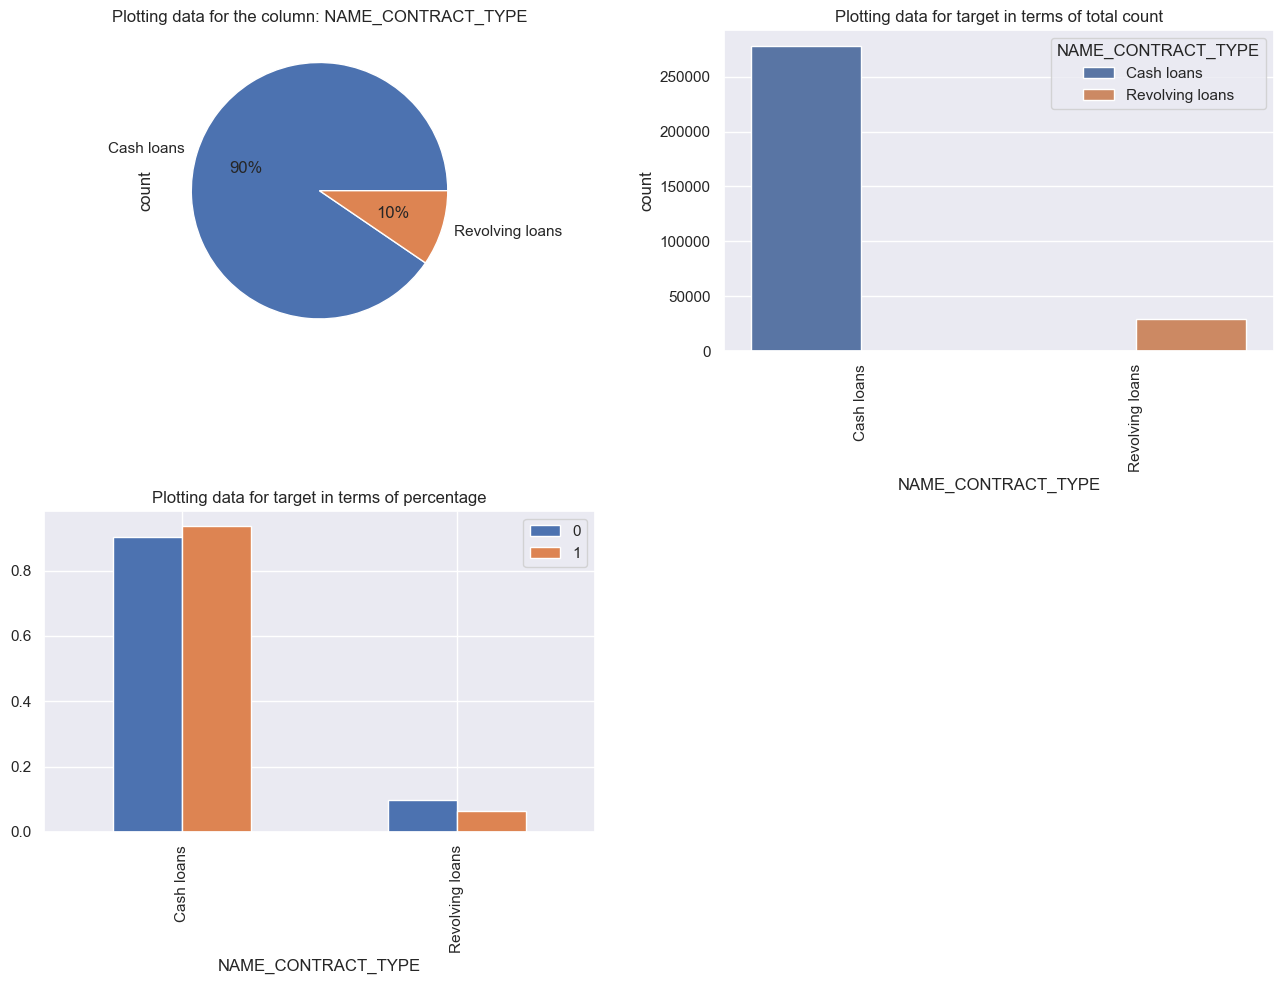

*********************************************************************************************************
Plotting  CODE_GENDER


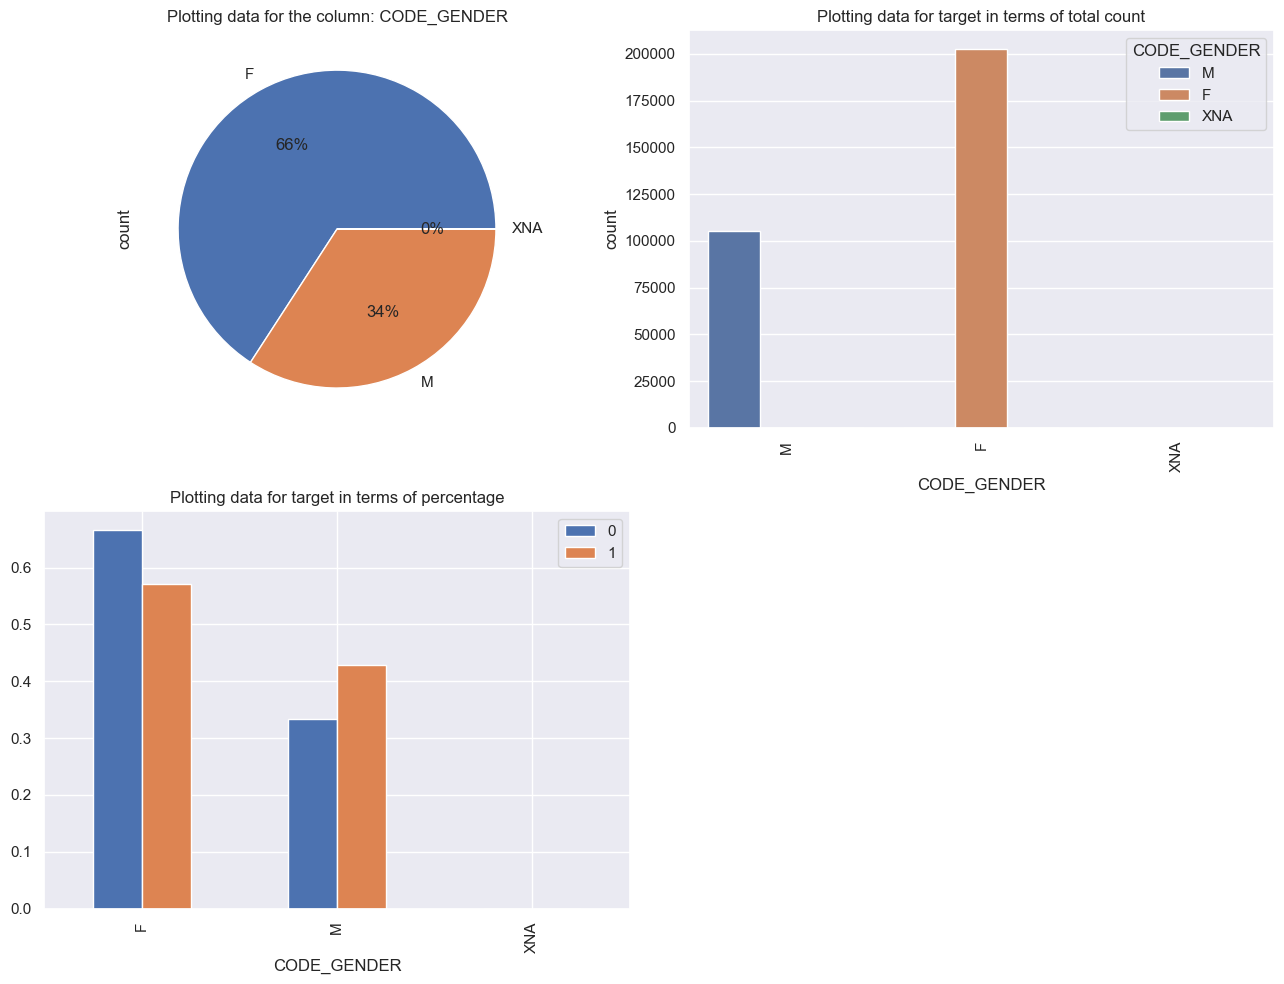

*********************************************************************************************************
Plotting  FLAG_OWN_CAR


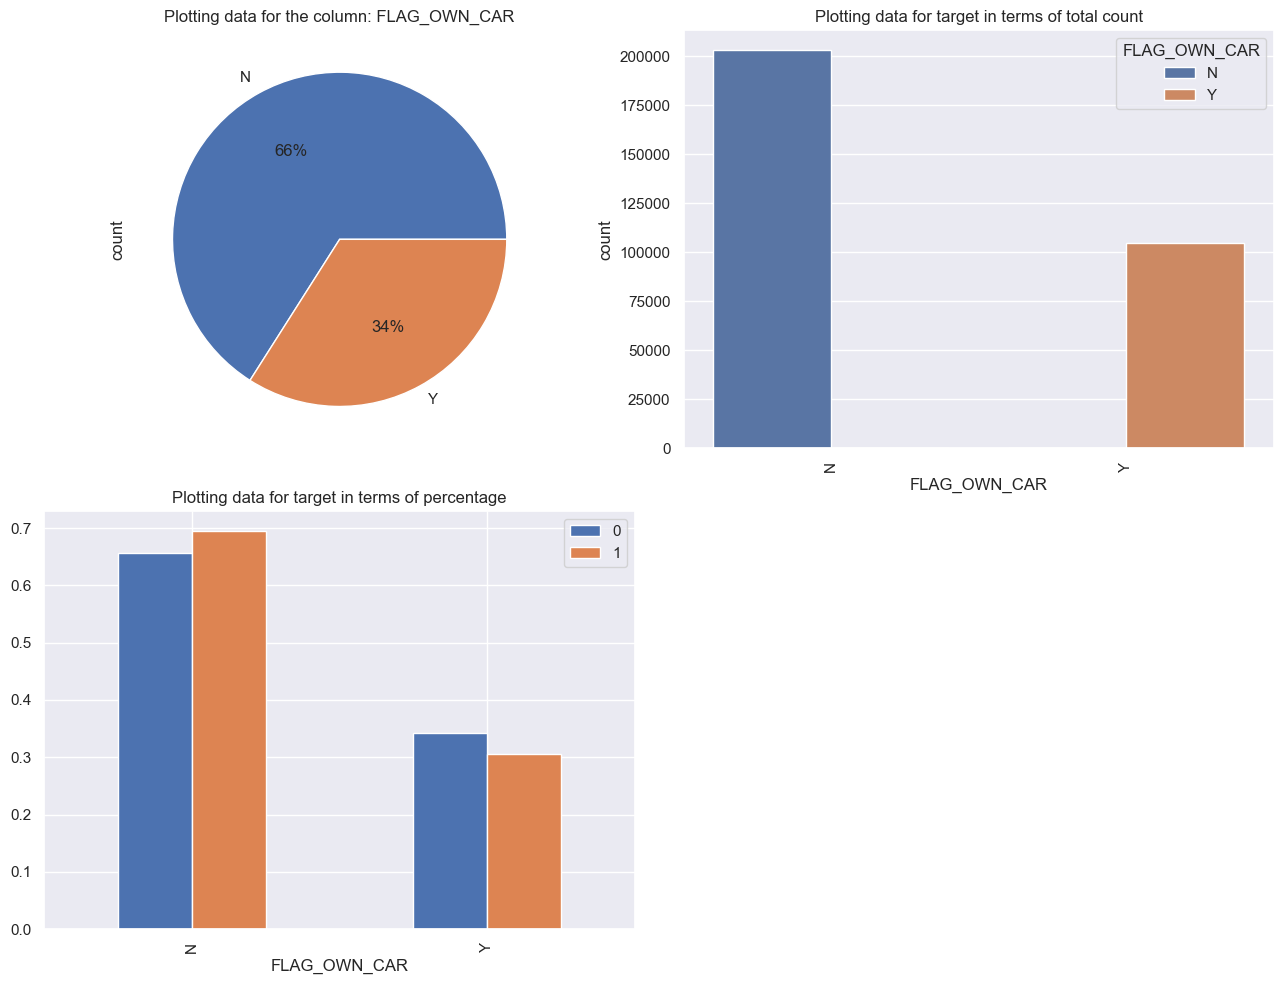

*********************************************************************************************************
Plotting  FLAG_OWN_REALTY


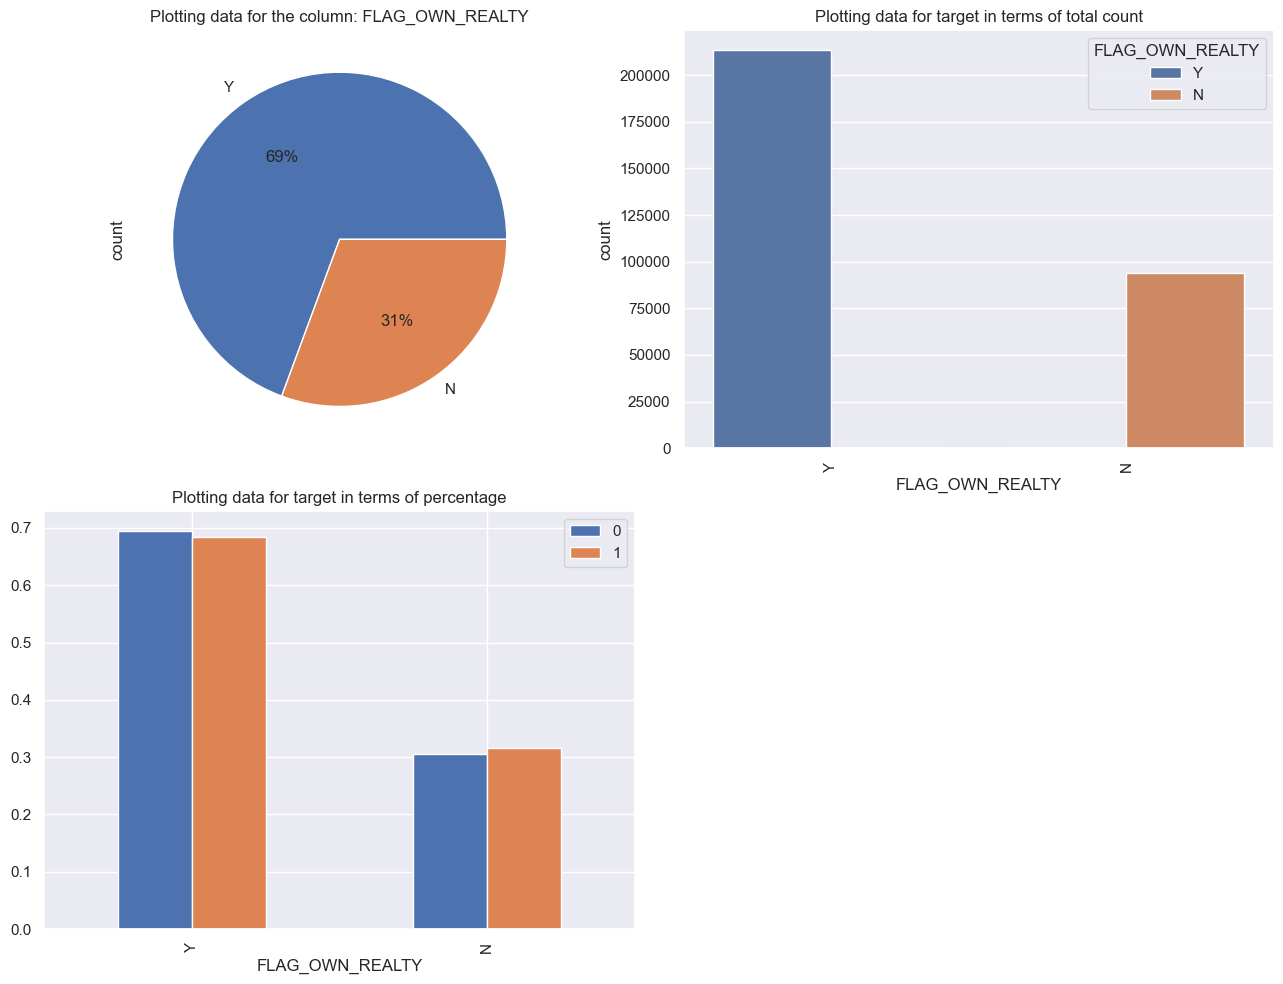

*********************************************************************************************************
Plotting  NAME_TYPE_SUITE


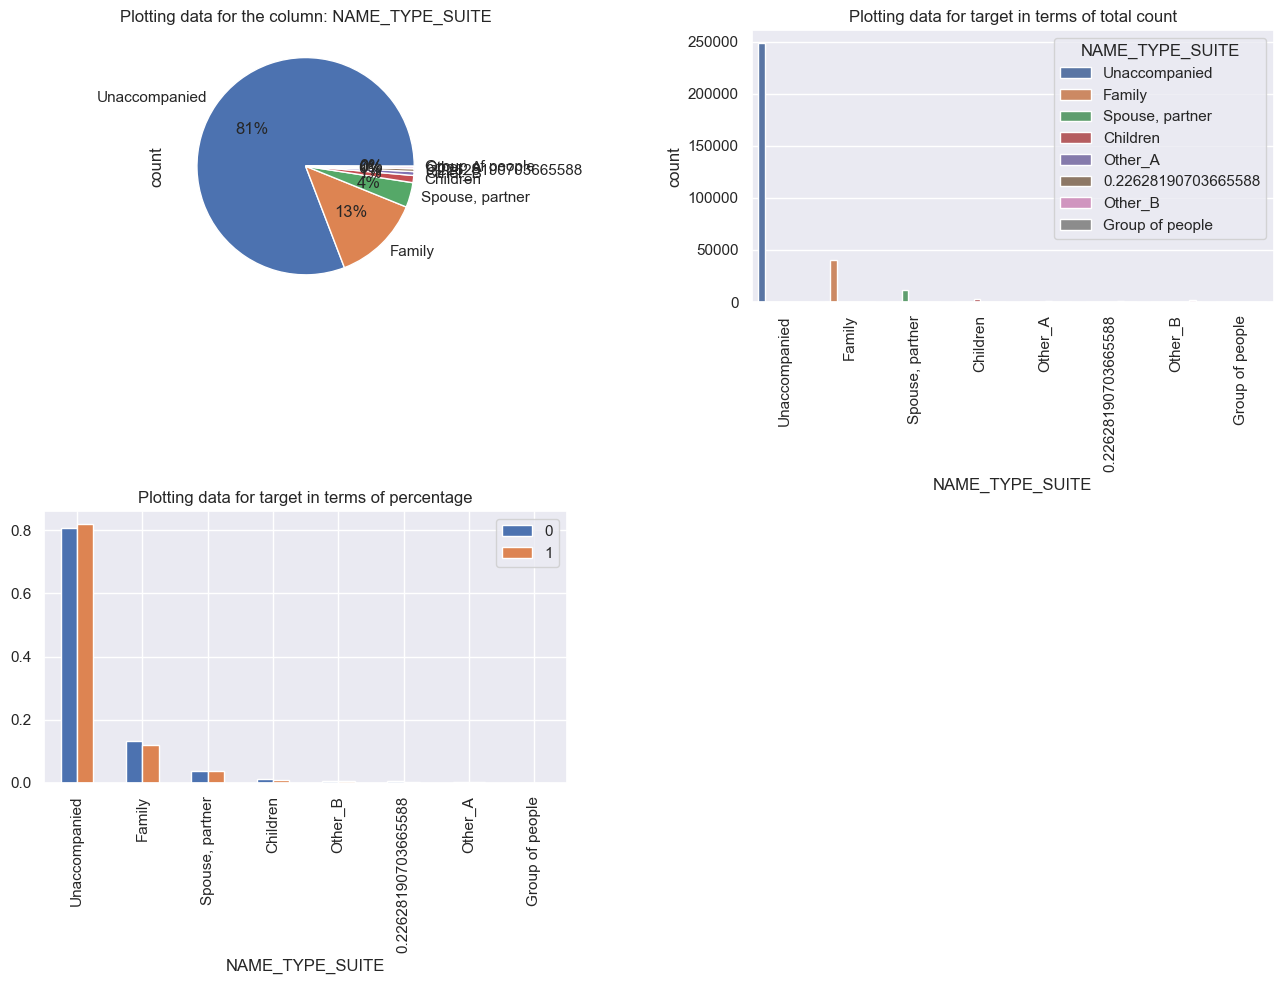

*********************************************************************************************************
Plotting  NAME_INCOME_TYPE


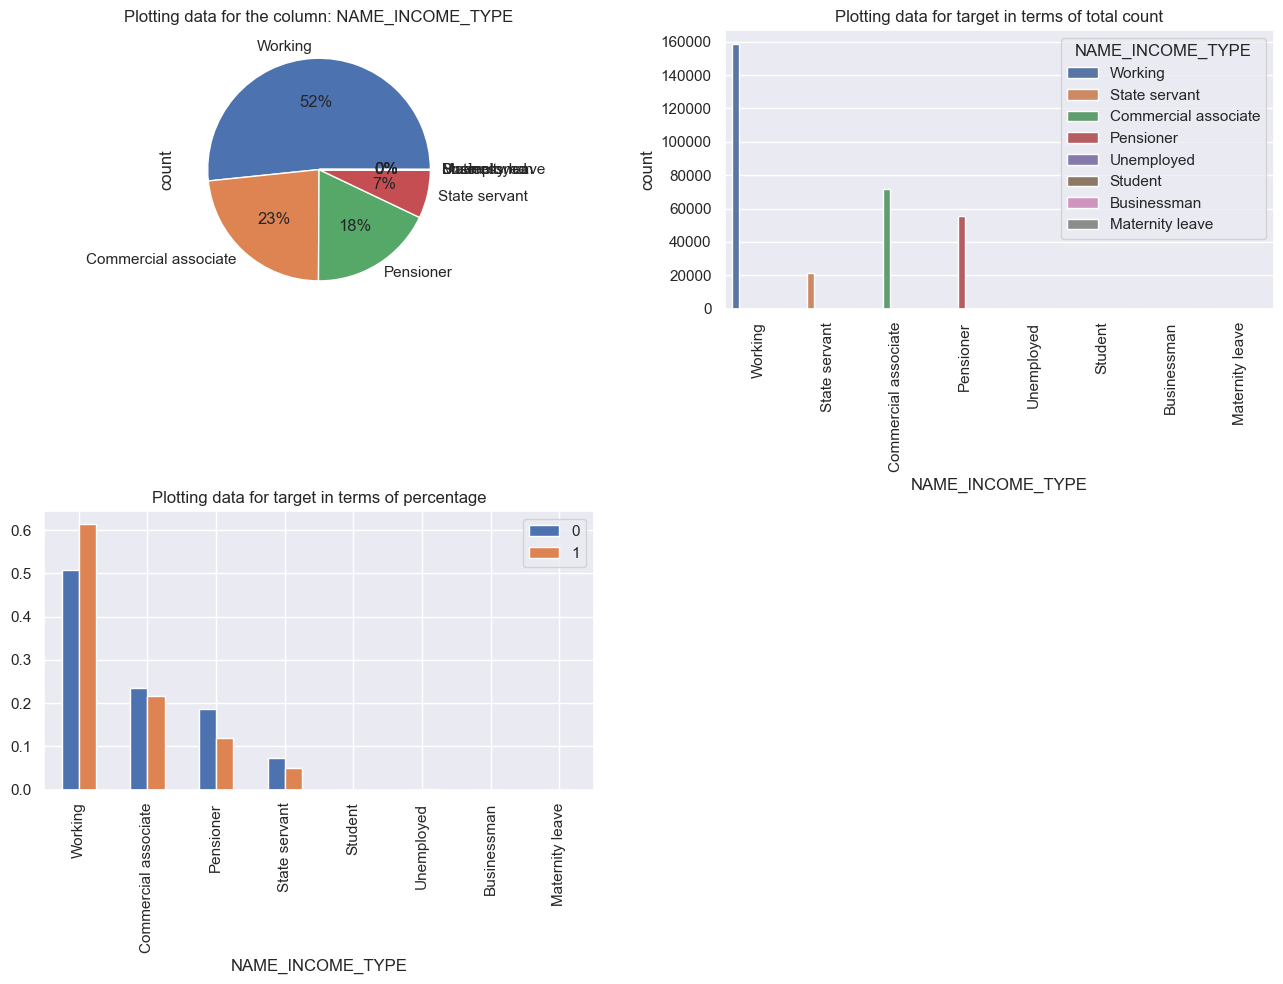

*********************************************************************************************************
Plotting  NAME_EDUCATION_TYPE


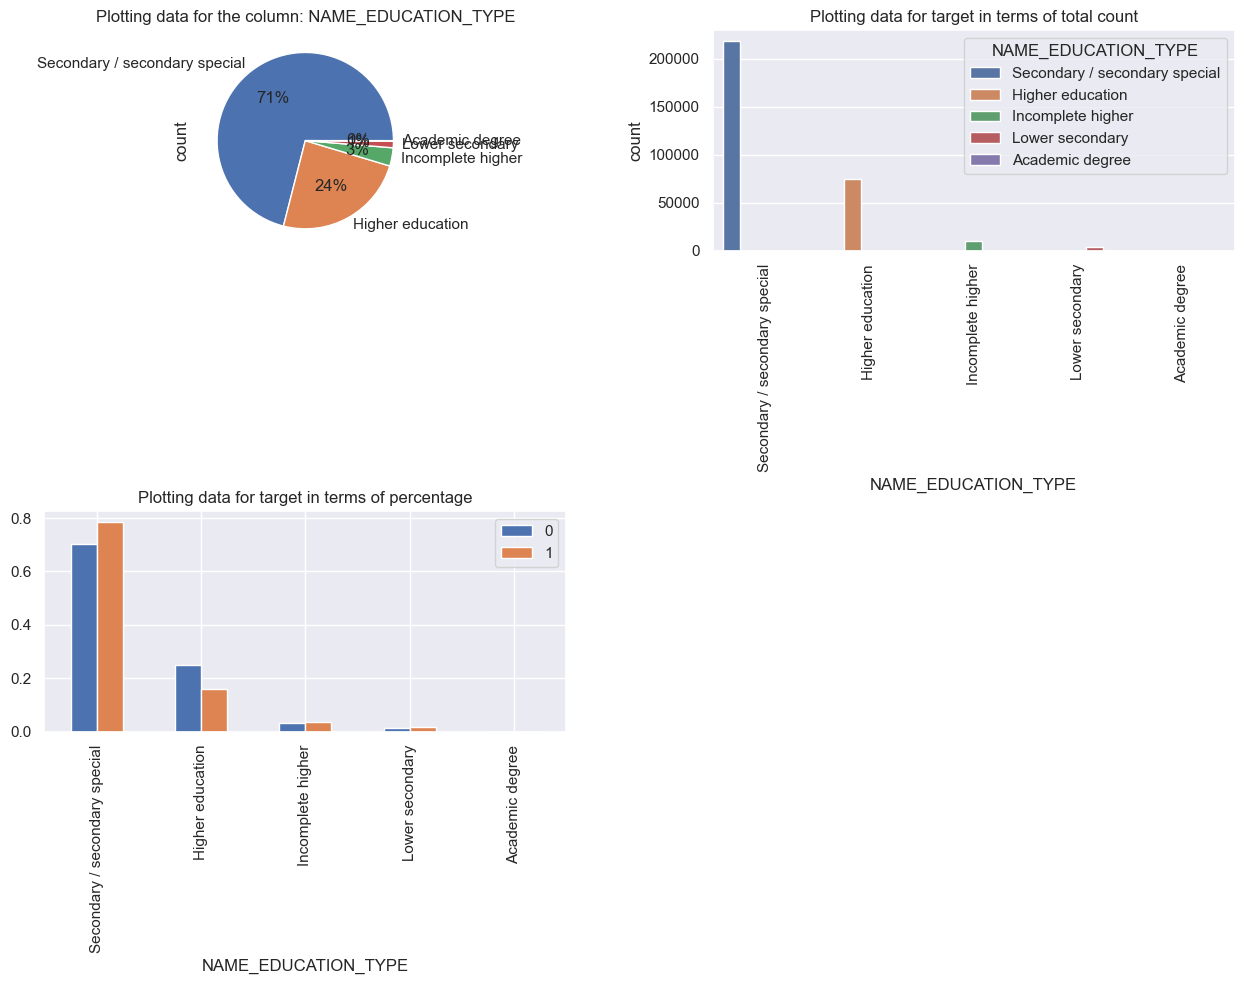

*********************************************************************************************************
Plotting  NAME_FAMILY_STATUS


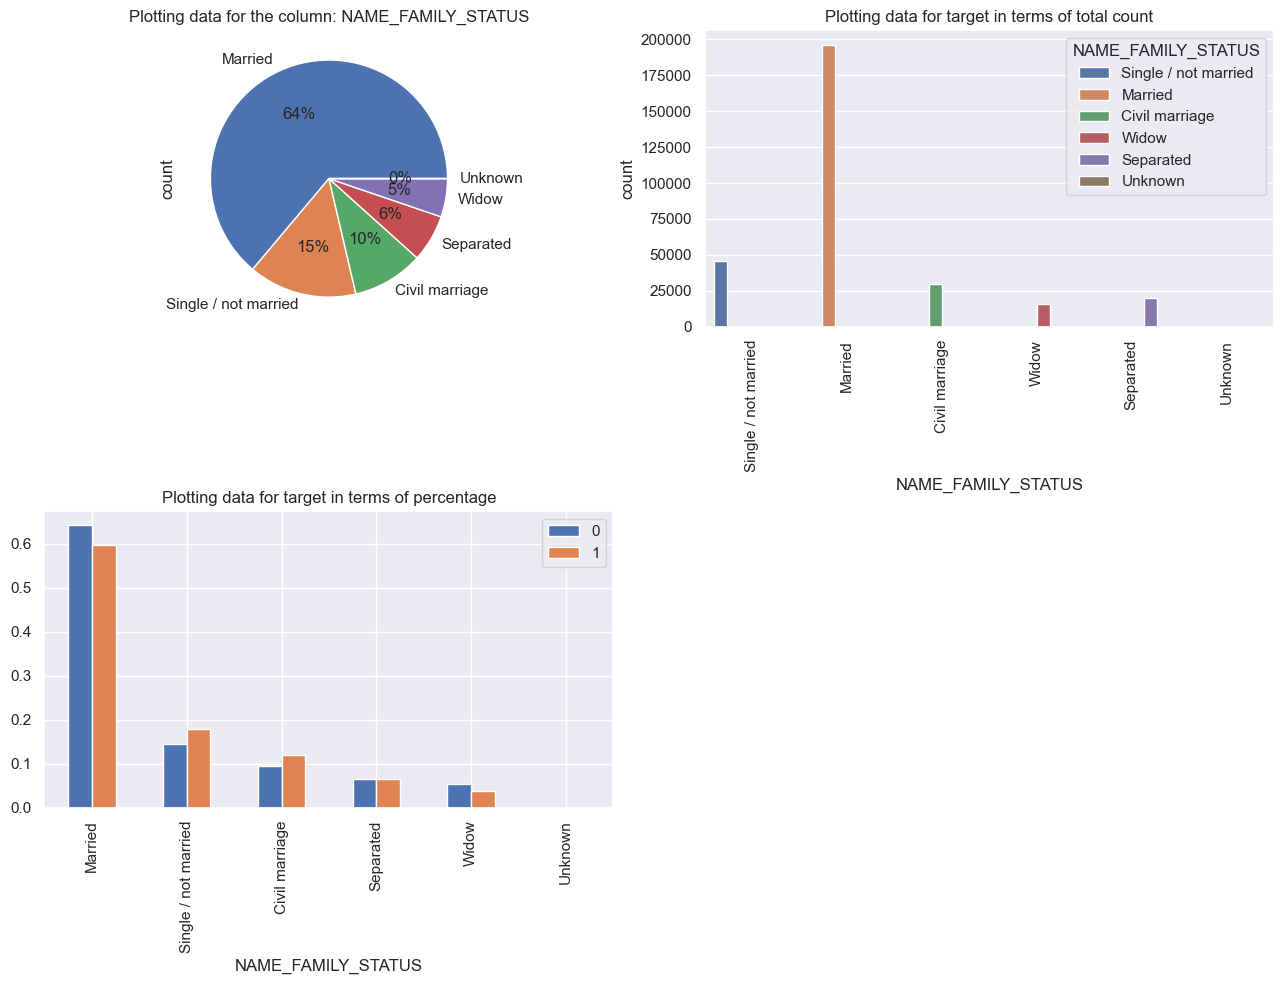

*********************************************************************************************************
Plotting  NAME_HOUSING_TYPE


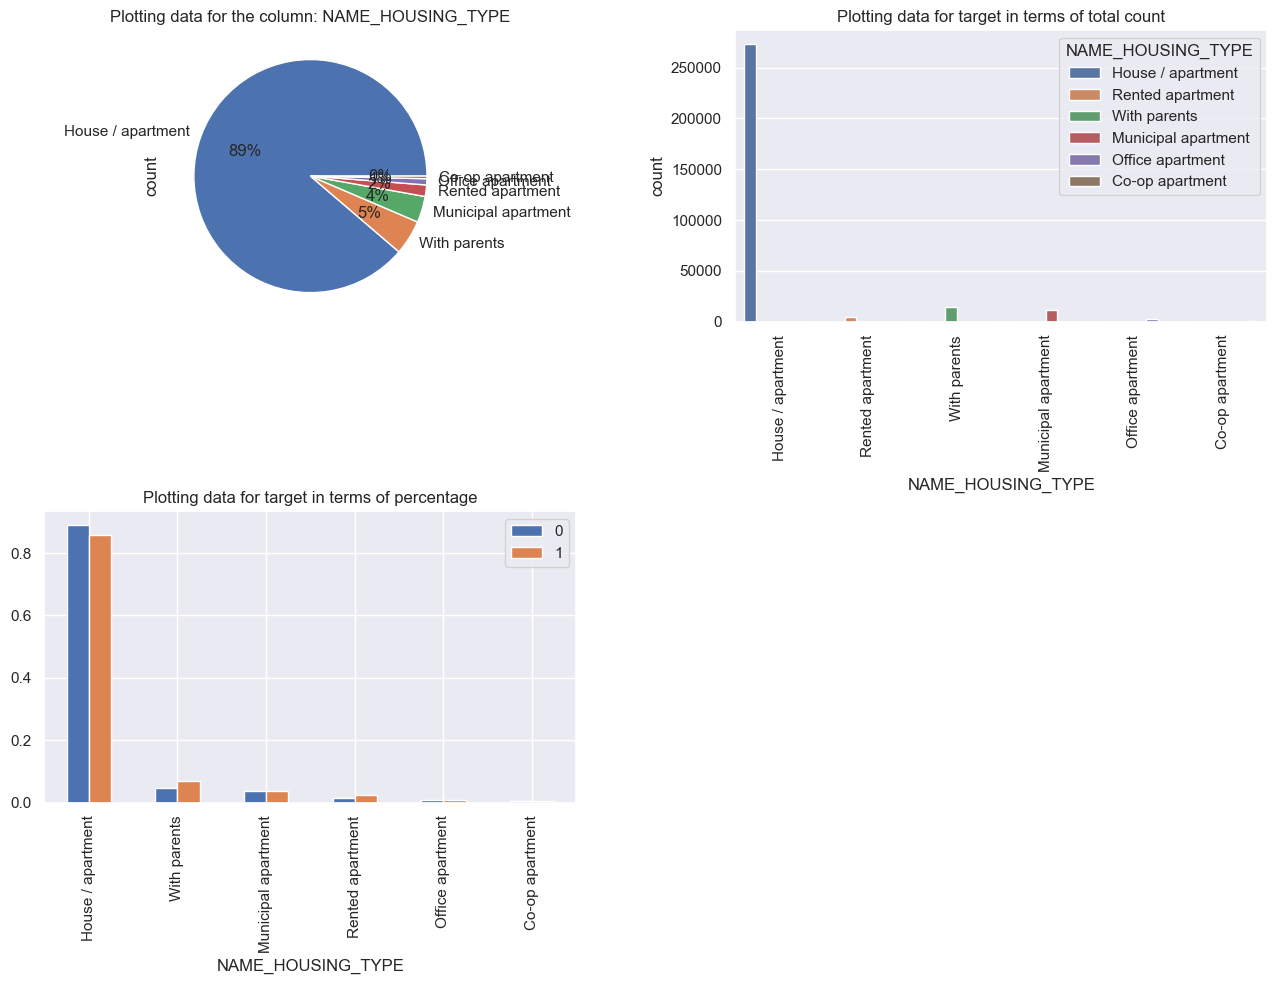

*********************************************************************************************************
Plotting  OCCUPATION_TYPE


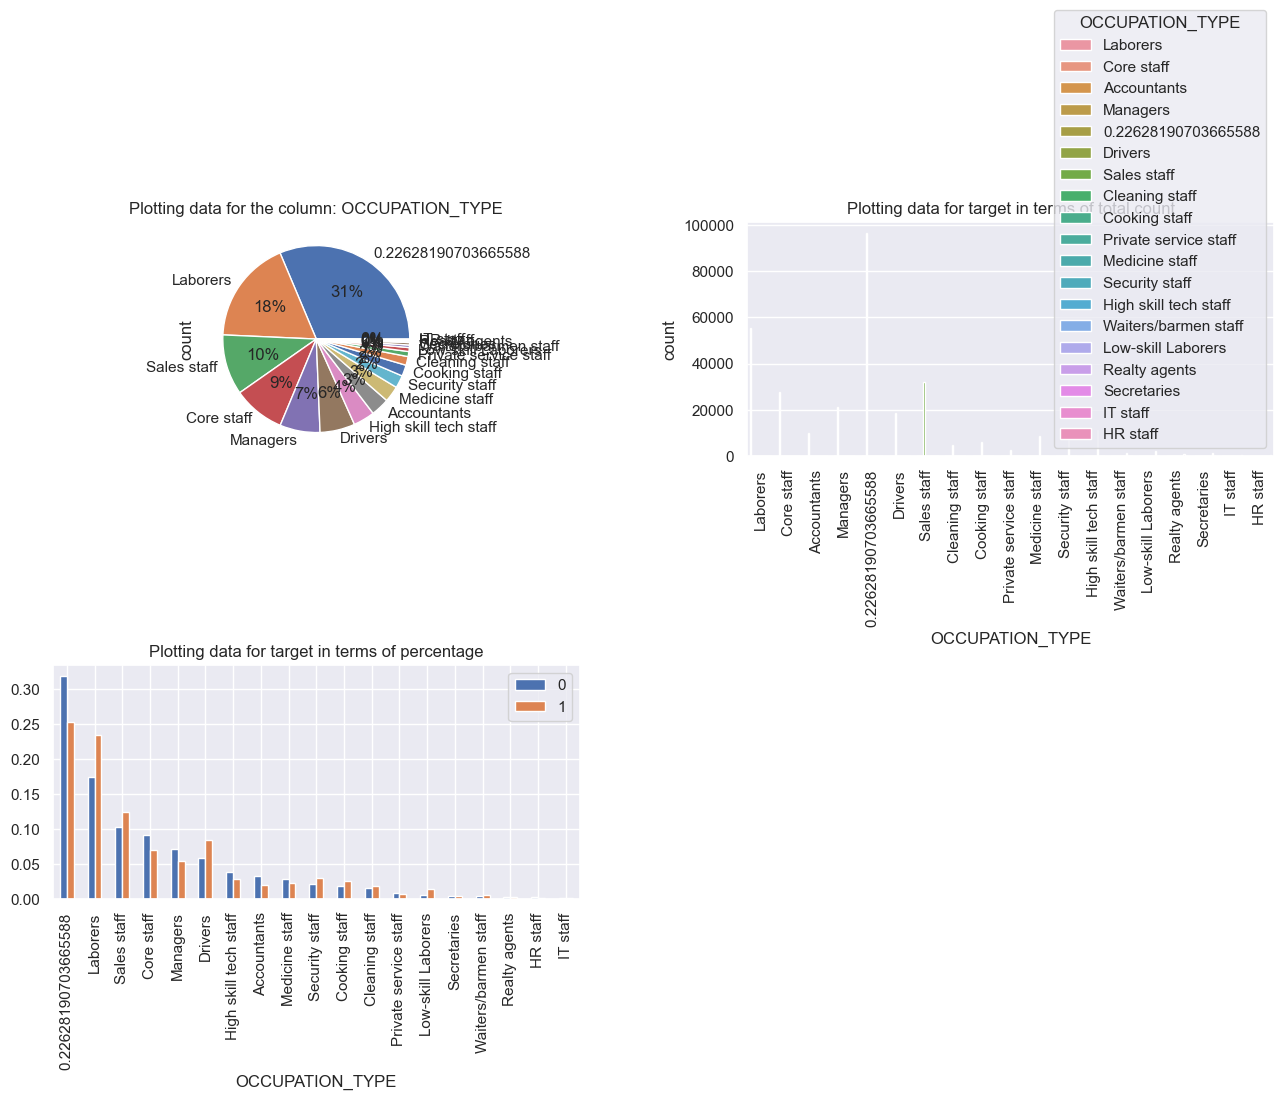

*********************************************************************************************************
Plotting  WEEKDAY_APPR_PROCESS_START


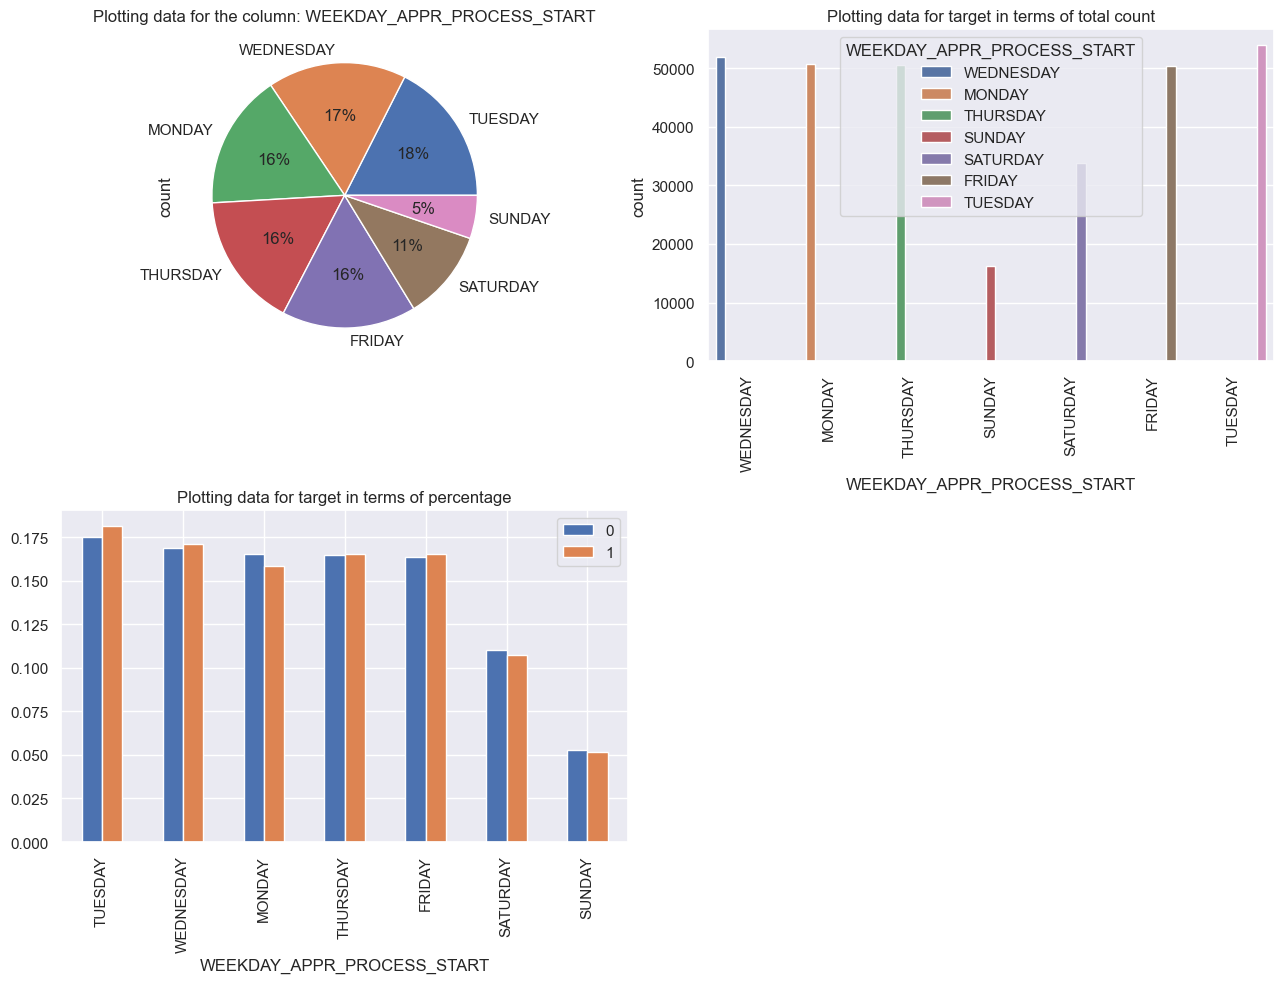

*********************************************************************************************************
Plotting  ORGANIZATION_TYPE


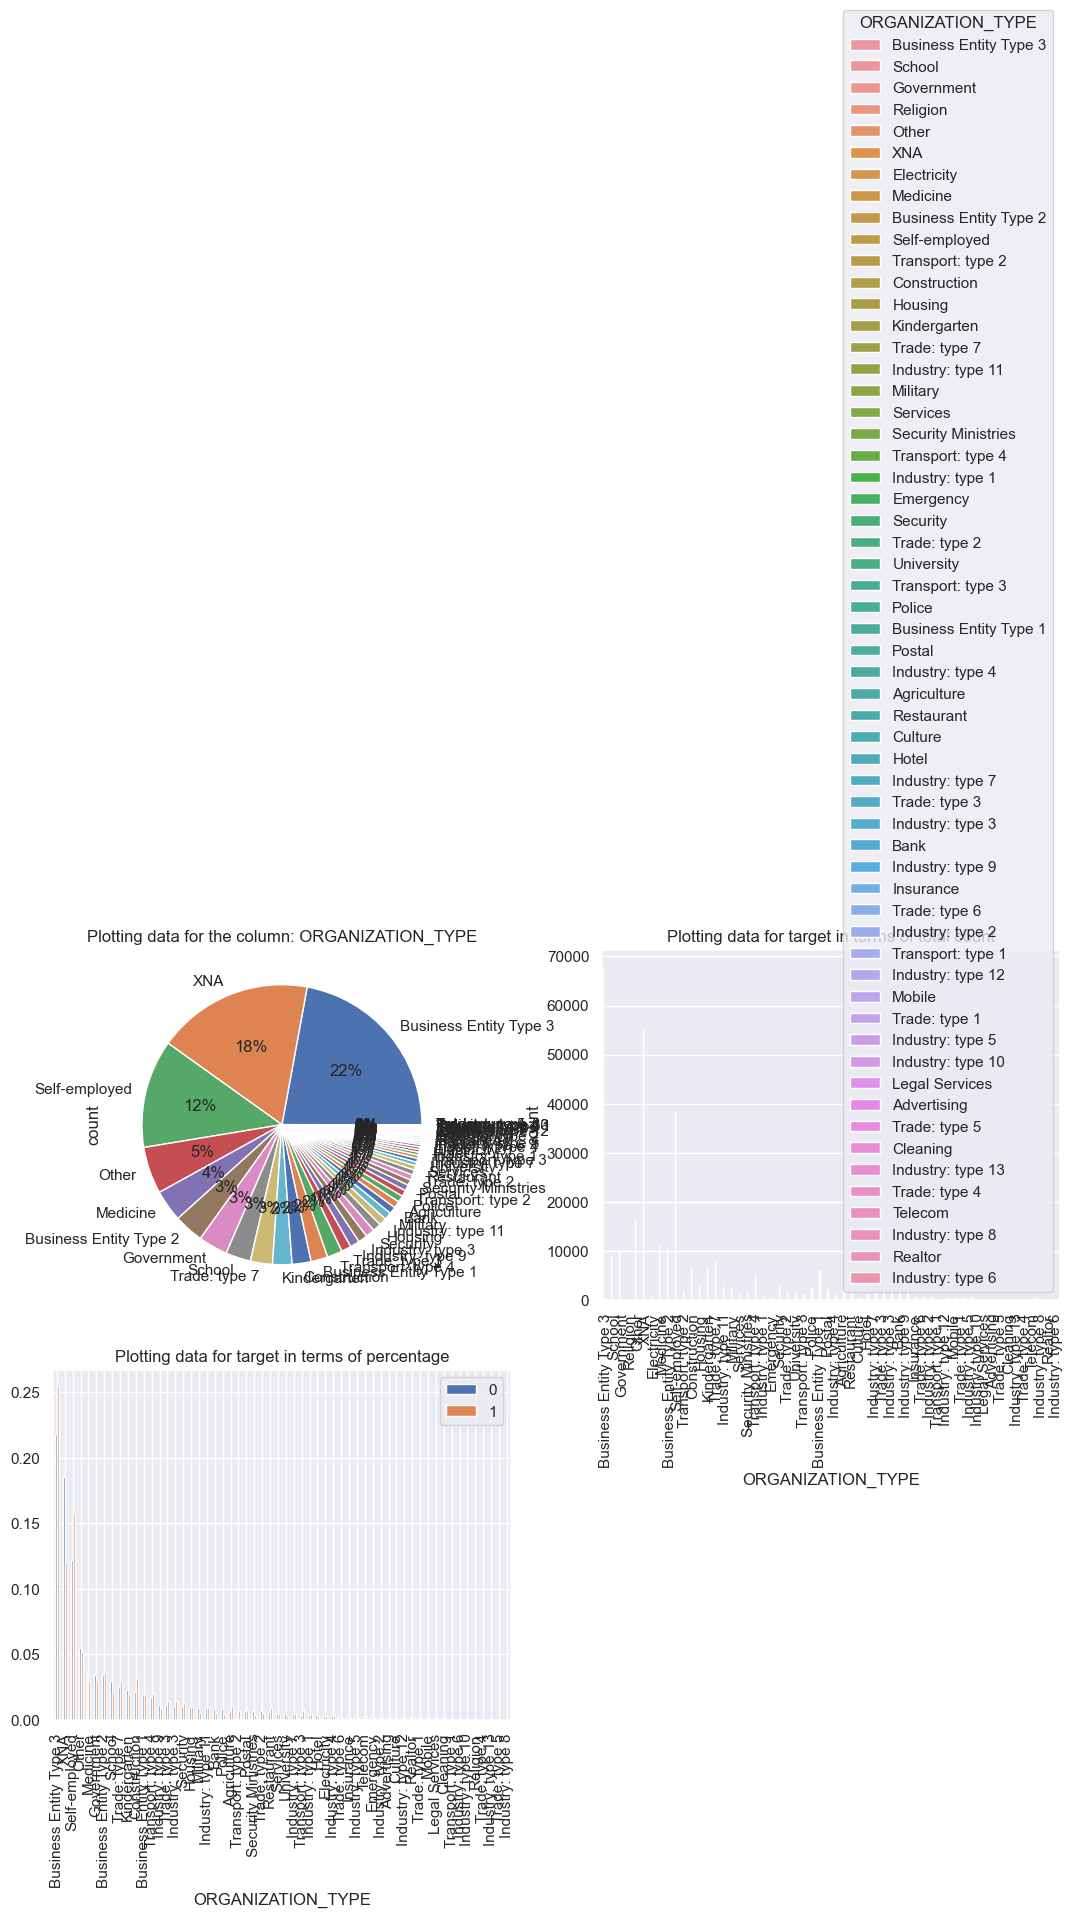

*********************************************************************************************************
Plotting  EMERGENCYSTATE_MODE


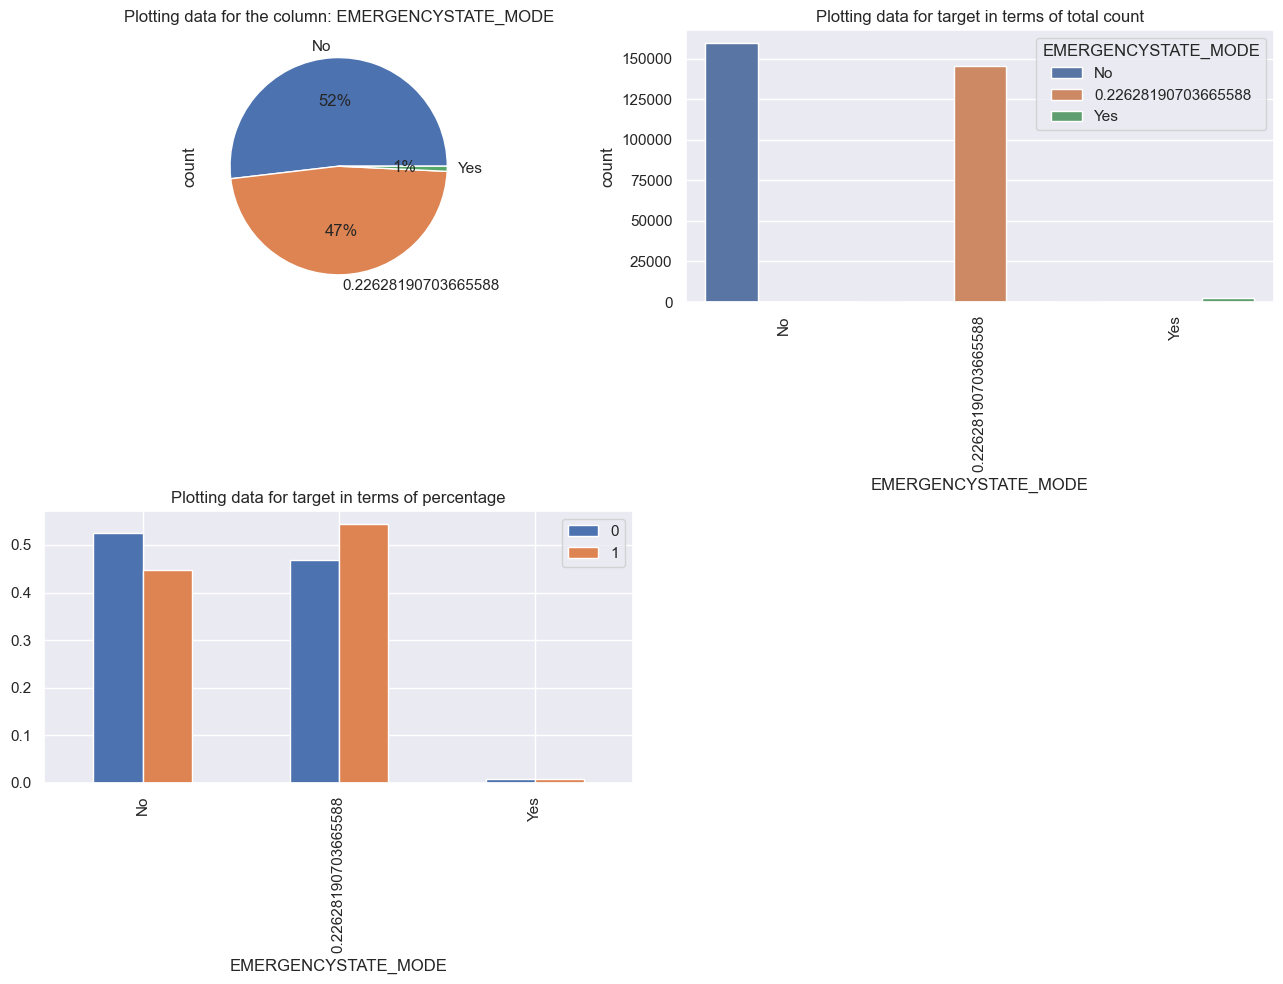

*********************************************************************************************************


In [49]:
# Creating a loop for the categorical columns
for column in traincat:
    print("Plotting ", column)
    plotting(ad0, train_0, train_1, column)
    print('*********************************************************************************************************')

By observing the above graphs we can get at least 10 insights for the bank where they can decide weather to lend money or not.

# Nemurical Data

# Finding the Top Correlation 

In [50]:
# Finding the Top Correlations.
train_0_encoded = pd.get_dummies(train_0)
correlation_matrix_train0 = train_0_encoded.corr()
correlation_matrix_train0.abs().unstack().sort_values().dropna().head(10)
correlation_0 = correlation_matrix_train0[correlation_matrix_train0 != 1.0]
correlation_0.head(10)

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                         NaN     NaN     -0.000716   
TARGET                             NaN     NaN           NaN   
CNT_CHILDREN                 -0.000716     NaN           NaN   
AMT_INCOME_TOTAL              0.001739     NaN      0.027397   
AMT_CREDIT                   -0.000342     NaN      0.003081   
AMT_ANNUITY                   0.000096     NaN      0.020949   
AMT_GOODS_PRICE              -0.000378     NaN     -0.000723   
REGION_POPULATION_RELATIVE    0.000360     NaN     -0.024363   
DAYS_BIRTH                   -0.001346     NaN      0.336966   
DAYS_EMPLOYED                 0.001744     NaN     -0.243356   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                          0.001739   -0.000342     0.000096   
TARGET                                   NaN         NaN          NaN   
CNT_CHILDREN                        0.027397    0.003081     0.020949   
AMT_INCOME_TOTAL                         NaN    0.342799     0.418906   
AMT_CREDIT                          0.342799         NaN     0.771248   
AMT_ANNUITY                         0.418906    0.771248          NaN   
AMT_GOODS_PRICE                     0.349473    0.986966     0.776624   
REGION_POPULATION_RELATIVE          0.167851    0.100604     0.120899   
DAYS_BIRTH                          0.062609   -0.047378     0.012233   
DAYS_EMPLOYED                      -0.141250   -0.072515    -0.106379   

                            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                        -0.000378                    0.000360   
TARGET                                  NaN                         NaN   
CNT_CHILDREN                      -0.000723                   -0.024363   
AMT_INCOME_TOTAL                   0.349473                    0.167851   
AMT_CREDIT                         0.986966                    0.100604   
AMT_ANNUITY                        0.776624                    0.120899   
AMT_GOODS_PRICE                         NaN                    0.103926   
REGION_POPULATION_RELATIVE         0.103926                         NaN   
DAYS_BIRTH                        -0.045135                   -0.025244   
DAYS_EMPLOYED                     -0.070602                   -0.006961   

                            DAYS_BIRTH  DAYS_EMPLOYED  ...  \
SK_ID_CURR                   -0.001346       0.001744  ...   
TARGET                             NaN            NaN  ...   
CNT_CHILDREN                  0.336966      -0.243356  ...   
AMT_INCOME_TOTAL              0.062609      -0.141250  ...   
AMT_CREDIT                   -0.047378      -0.072515  ...   
AMT_ANNUITY                   0.012233      -0.106379  ...   
AMT_GOODS_PRICE              -0.045135      -0.070602  ...   
REGION_POPULATION_RELATIVE   -0.025244      -0.006961  ...   
DAYS_BIRTH                         NaN      -0.618048  ...   
DAYS_EMPLOYED                -0.618048            NaN  ...   

                            ORGANIZATION_TYPE_Trade: type 7  \
SK_ID_CURR                                         0.003757   
TARGET                                                  NaN   
CNT_CHILDREN                                       0.018466   
AMT_INCOME_TOTAL                                  -0.001351   
AMT_CREDIT                                         0.002767   
AMT_ANNUITY                                        0.010833   
AMT_GOODS_PRICE                                    0.003167   
REGION_POPULATION_RELATIVE                        -0.014570   
DAYS_BIRTH                                         0.054370   
DAYS_EMPLOYED                                     -0.075920   

                            ORGANIZATION_TYPE_Transport: type 1  \
SK_ID_CURR                                            -0.000347   
TARGET                                                      NaN   
CNT_CHILDREN                                           0.001268   
AMT_INCOME_TOTAL                                

Above are the top correlations for train_0. 

# Finding the Defaulter Correlation 

In [51]:
# Finding the Defaulter Correlations.
train_1_encoded = pd.get_dummies(train_1)
correlation_matrix_train1 = train_0_encoded.corr()
correlation_matrix_train1.abs().unstack().sort_values().dropna().head(10)
correlation_1 = correlation_matrix_train1[correlation_matrix_train1 != 1.0]
correlation_1.head(10)

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                         NaN     NaN     -0.000716   
TARGET                             NaN     NaN           NaN   
CNT_CHILDREN                 -0.000716     NaN           NaN   
AMT_INCOME_TOTAL              0.001739     NaN      0.027397   
AMT_CREDIT                   -0.000342     NaN      0.003081   
AMT_ANNUITY                   0.000096     NaN      0.020949   
AMT_GOODS_PRICE              -0.000378     NaN     -0.000723   
REGION_POPULATION_RELATIVE    0.000360     NaN     -0.024363   
DAYS_BIRTH                   -0.001346     NaN      0.336966   
DAYS_EMPLOYED                 0.001744     NaN     -0.243356   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                          0.001739   -0.000342     0.000096   
TARGET                                   NaN         NaN          NaN   
CNT_CHILDREN                        0.027397    0.003081     0.020949   
AMT_INCOME_TOTAL                         NaN    0.342799     0.418906   
AMT_CREDIT                          0.342799         NaN     0.771248   
AMT_ANNUITY                         0.418906    0.771248          NaN   
AMT_GOODS_PRICE                     0.349473    0.986966     0.776624   
REGION_POPULATION_RELATIVE          0.167851    0.100604     0.120899   
DAYS_BIRTH                          0.062609   -0.047378     0.012233   
DAYS_EMPLOYED                      -0.141250   -0.072515    -0.106379   

                            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                        -0.000378                    0.000360   
TARGET                                  NaN                         NaN   
CNT_CHILDREN                      -0.000723                   -0.024363   
AMT_INCOME_TOTAL                   0.349473                    0.167851   
AMT_CREDIT                         0.986966                    0.100604   
AMT_ANNUITY                        0.776624                    0.120899   
AMT_GOODS_PRICE                         NaN                    0.103926   
REGION_POPULATION_RELATIVE         0.103926                         NaN   
DAYS_BIRTH                        -0.045135                   -0.025244   
DAYS_EMPLOYED                     -0.070602                   -0.006961   

                            DAYS_BIRTH  DAYS_EMPLOYED  ...  \
SK_ID_CURR                   -0.001346       0.001744  ...   
TARGET                             NaN            NaN  ...   
CNT_CHILDREN                  0.336966      -0.243356  ...   
AMT_INCOME_TOTAL              0.062609      -0.141250  ...   
AMT_CREDIT                   -0.047378      -0.072515  ...   
AMT_ANNUITY                   0.012233      -0.106379  ...   
AMT_GOODS_PRICE              -0.045135      -0.070602  ...   
REGION_POPULATION_RELATIVE   -0.025244      -0.006961  ...   
DAYS_BIRTH                         NaN      -0.618048  ...   
DAYS_EMPLOYED                -0.618048            NaN  ...   

                            ORGANIZATION_TYPE_Trade: type 7  \
SK_ID_CURR                                         0.003757   
TARGET                                                  NaN   
CNT_CHILDREN                                       0.018466   
AMT_INCOME_TOTAL                                  -0.001351   
AMT_CREDIT                                         0.002767   
AMT_ANNUITY                                        0.010833   
AMT_GOODS_PRICE                                    0.003167   
REGION_POPULATION_RELATIVE                        -0.014570   
DAYS_BIRTH                                         0.054370   
DAYS_EMPLOYED                                     -0.075920   

                            ORGANIZATION_TYPE_Transport: type 1  \
SK_ID_CURR                                            -0.000347   
TARGET                                                      NaN   
CNT_CHILDREN                                           0.001268   
AMT_INCOME_TOTAL                                

Above are the top defaulter correlations for train_1. 

# Finding the outliers for better analysis

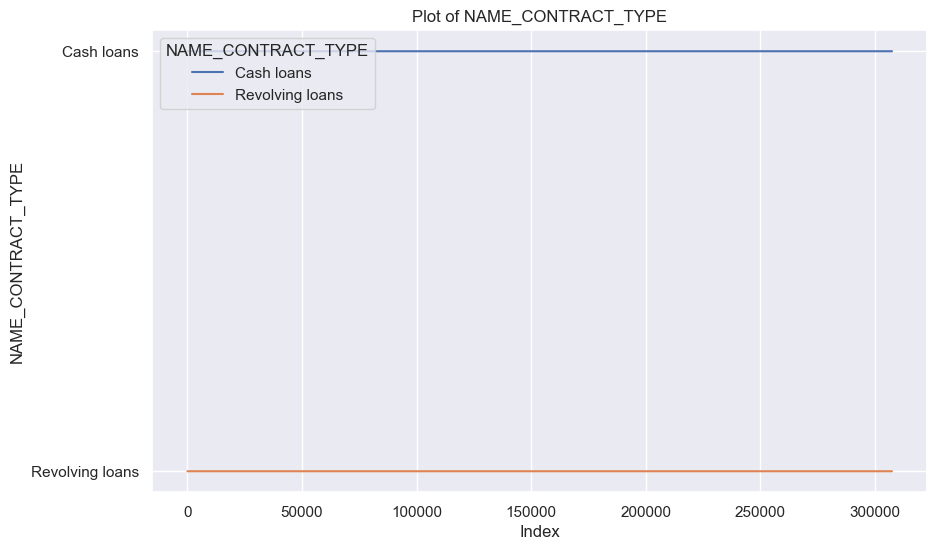

*********************************************************************************************************


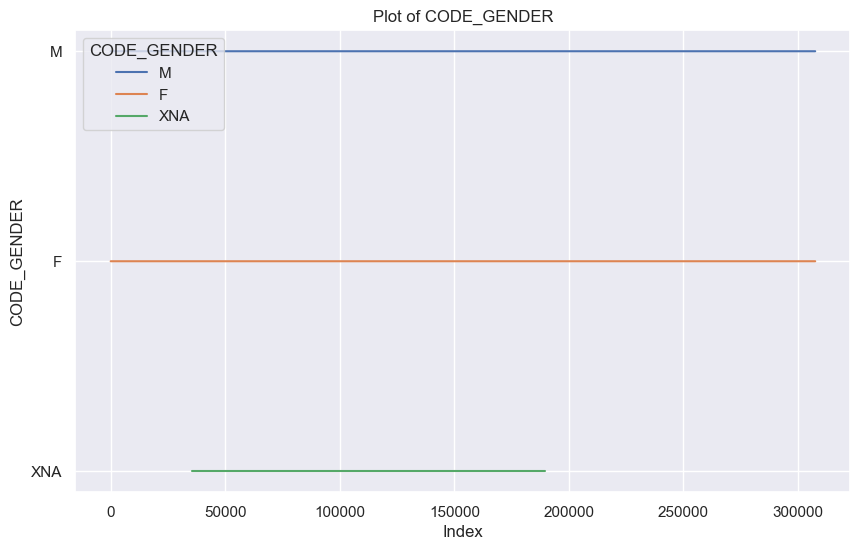

*********************************************************************************************************


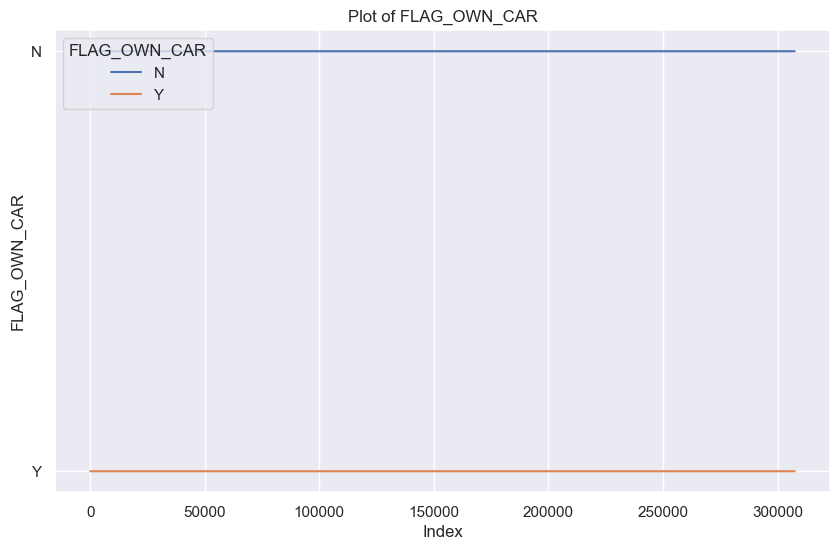

*********************************************************************************************************


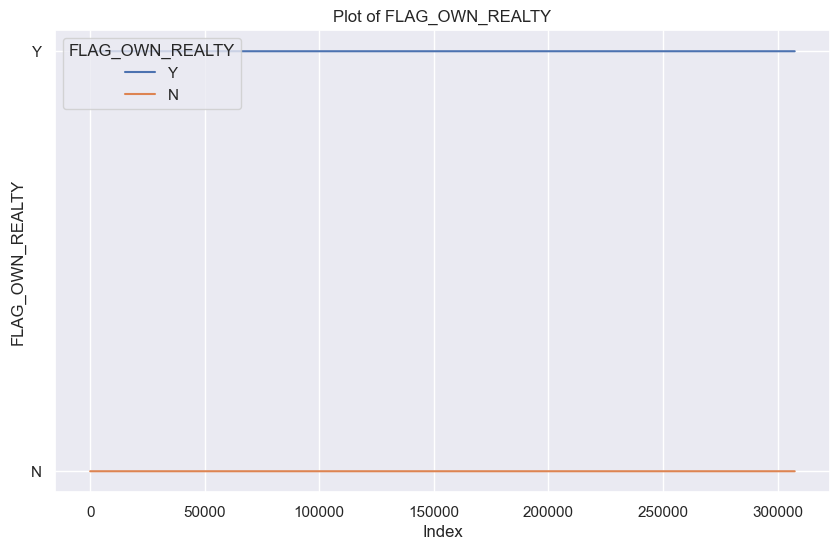

*********************************************************************************************************


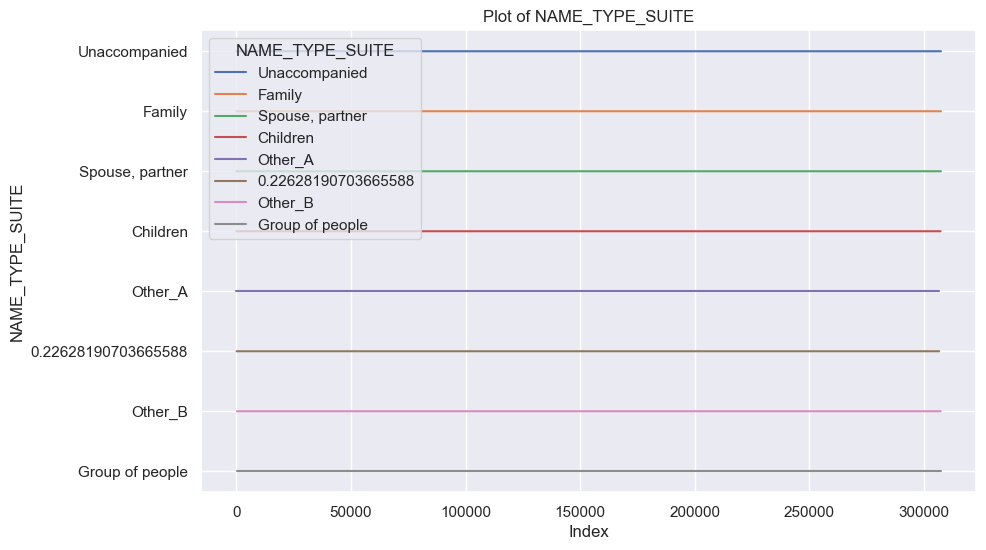

*********************************************************************************************************


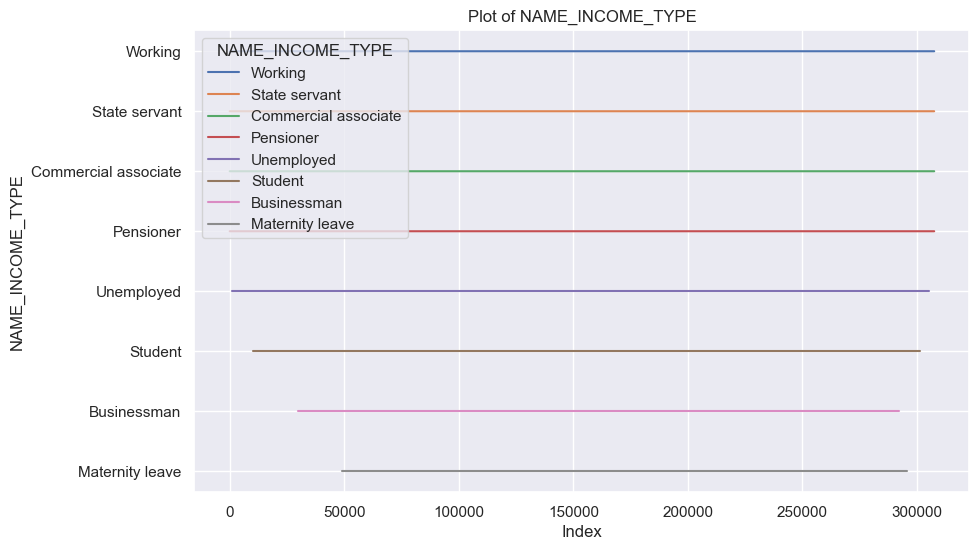

*********************************************************************************************************


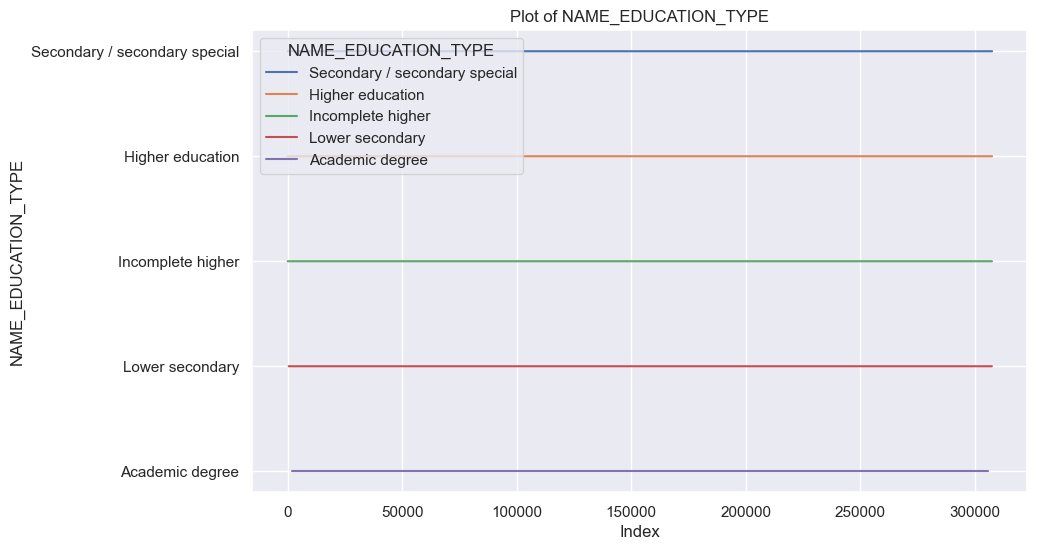

*********************************************************************************************************


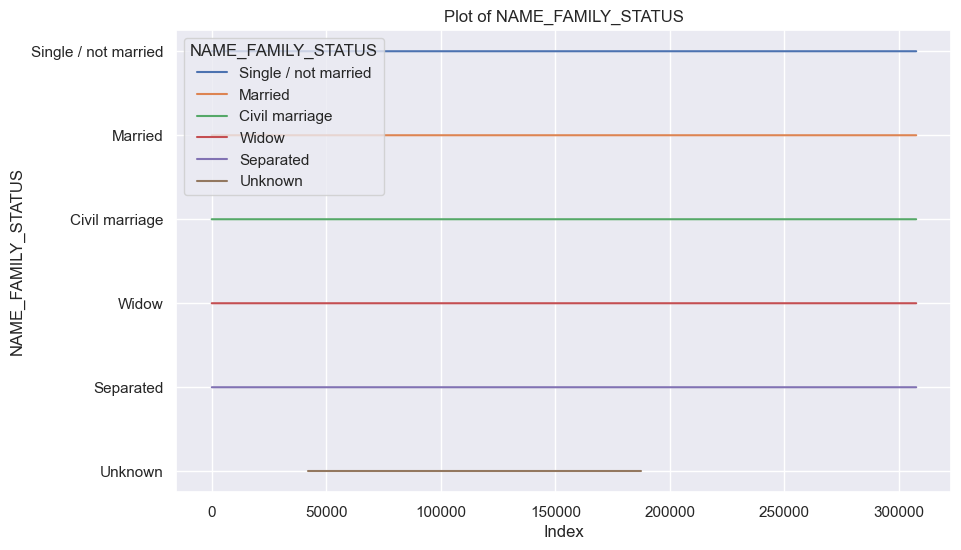

*********************************************************************************************************


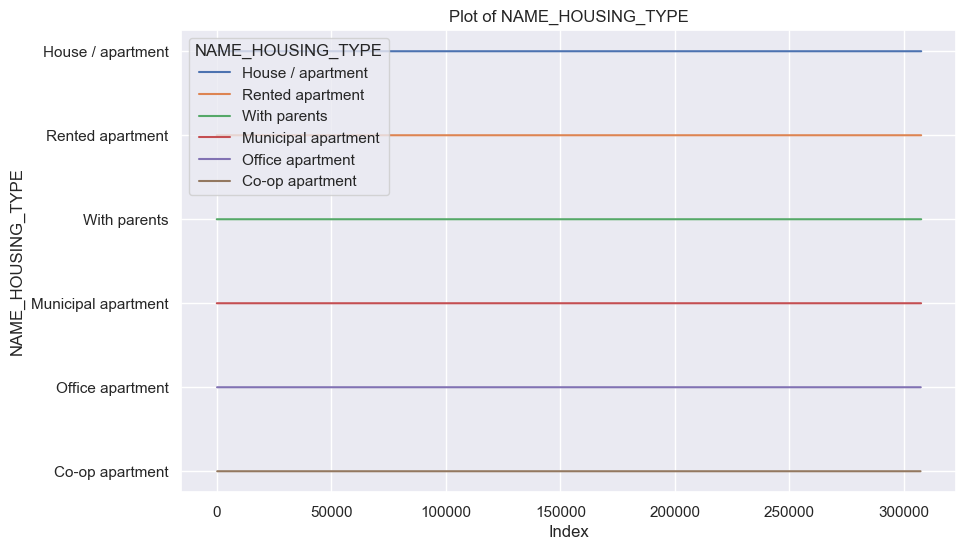

*********************************************************************************************************


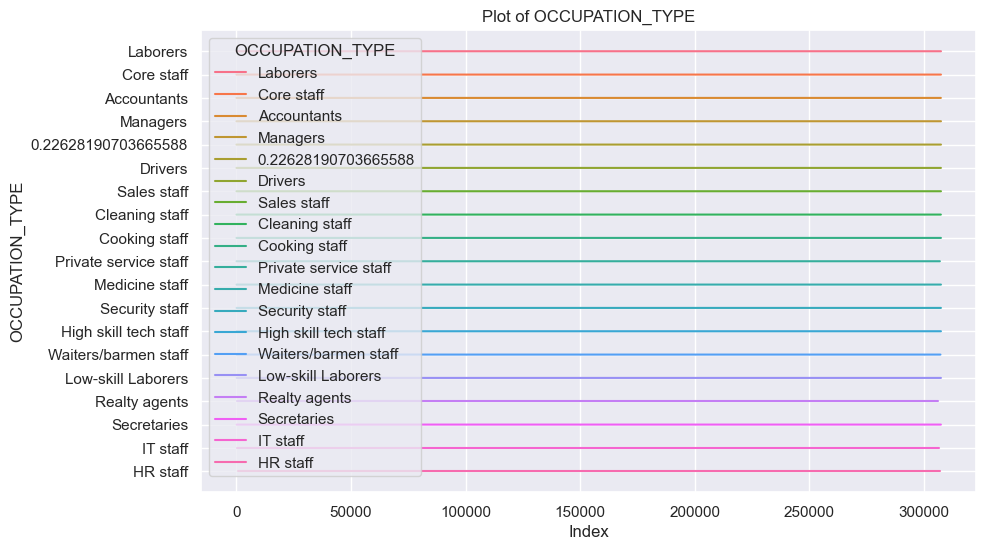

*********************************************************************************************************


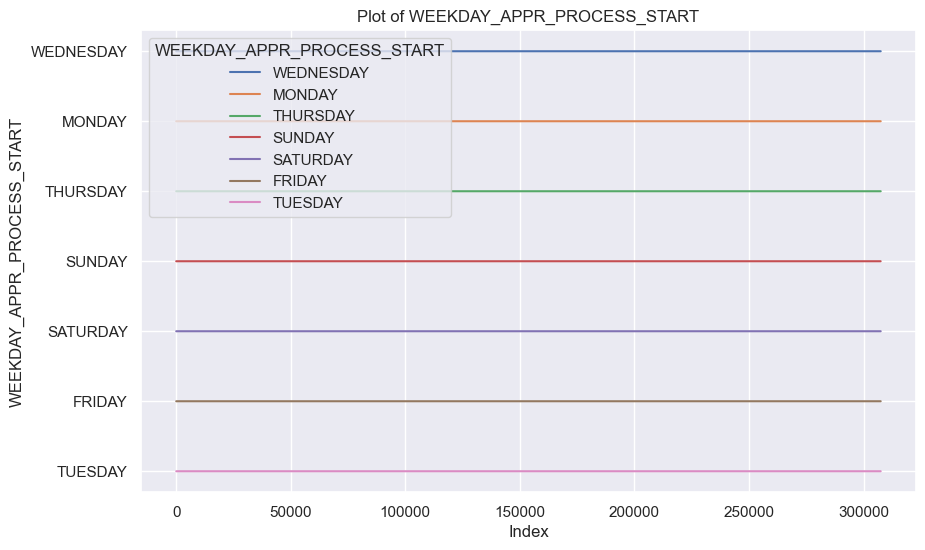

*********************************************************************************************************


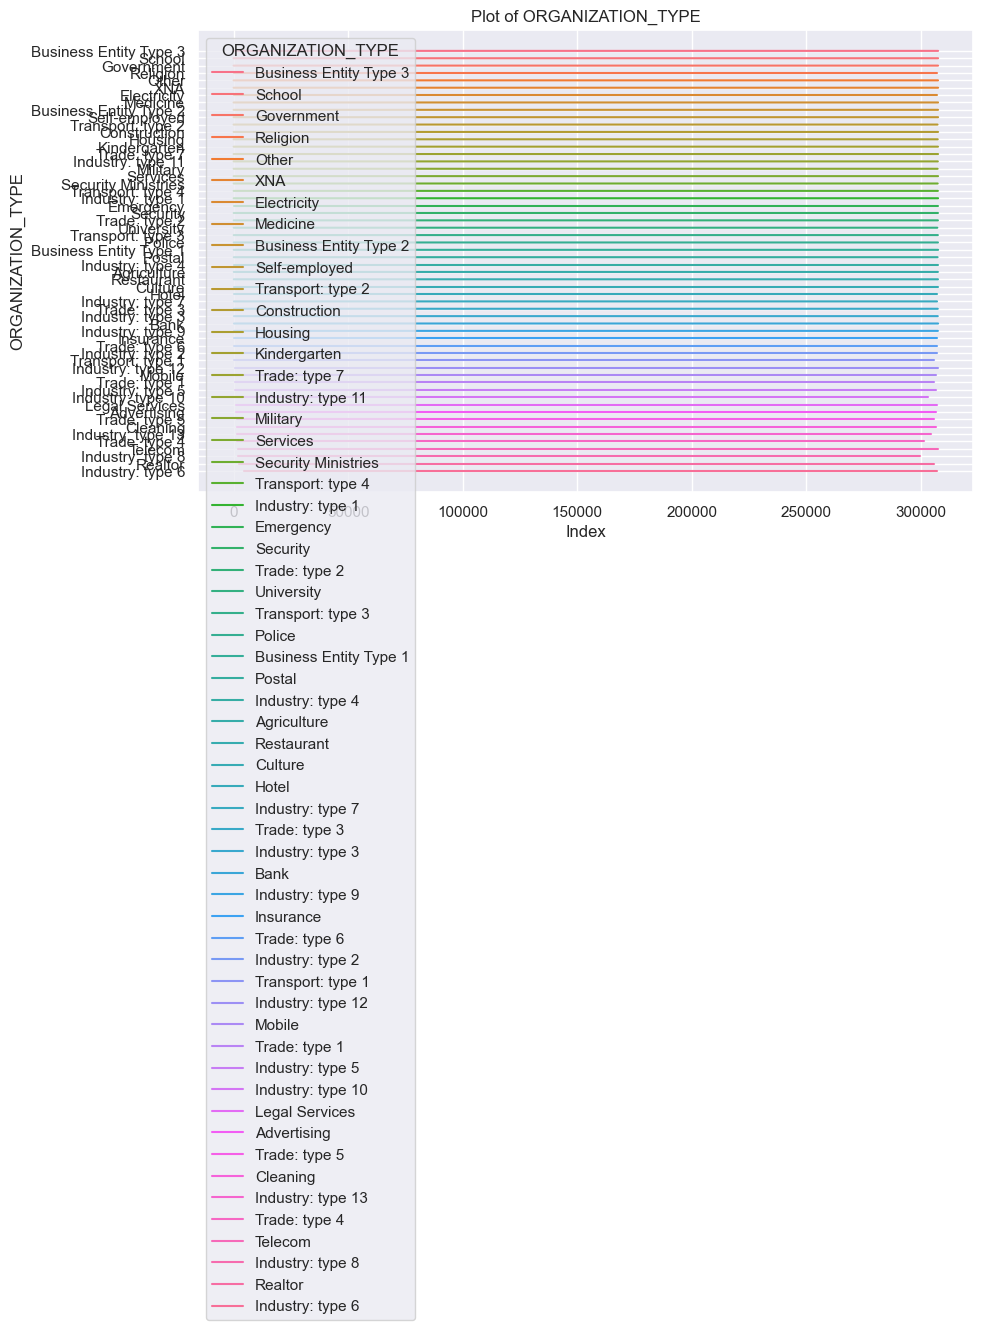

*********************************************************************************************************


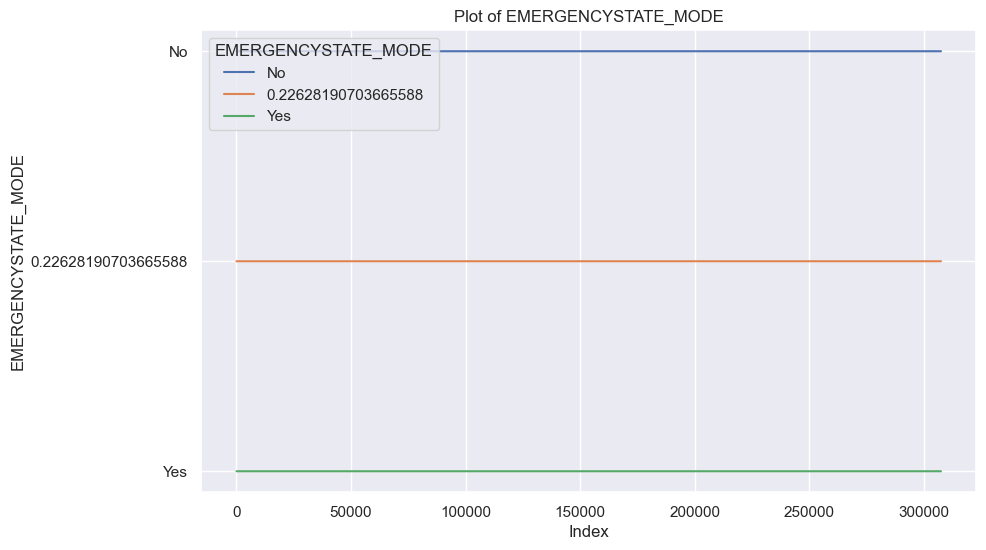

*********************************************************************************************************


In [52]:
# Finding the outliers for the coloums using the plot with numerical data based on the index.

import seaborn as sns
import matplotlib.pyplot as plt

for column in traincat:
    title = "Plot of " + column
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=ad0.index, y=ad0[column].astype(str), hue=ad0[column].astype(str))
    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend(title=column, loc='upper left')
    plt.savefig(column, dpi = 900, transparent = False, bbox_inches = 'tight', pad_inches = 'layout')
    plt.show()
    print('*********************************************************************************************************')

After absoving the above graphs we can conclude that there are no such outliers in the dataset.

 # Univariate Analysis of numerical data

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate over categorical columns
for column in traincat:
    # Convert categorical data to numerical format using one-hot encoding
    train_0_encoded = pd.get_dummies(train_0[column].astype(str))
    train_1_encoded = pd.get_dummies(train_1[column].astype(str))
    
    # Plot histograms
    title = "Histogram of "+column
    print(title)
    plt.hist(train_0_encoded, alpha=0.5, label='0')
    plt.hist(train_1_encoded, alpha=0.5, label='1')
    plt.legend()
    plt.savefig('1'+column, dpi = 900, transparent = False, bbox_inches = 'tight', pad_inches = 'layout')
    plt.show()
    
    # Plot distributions using distplot
    title = "Distributions of Observations of "+column
    print(title)
    sns.distplot(train_0_encoded, label='0')
    sns.distplot(train_1_encoded, label='1')
    plt.legend()
    plt.savefig('2'+column, dpi = 900, transparent = False, bbox_inches = 'tight', pad_inches = 'layout')
    plt.show()
    
    print("**********************************************************************************************************")


NameError: name 'traincat' is not defined

# Exploration and Analysis of the  Previous Application 

First we will read the previous_application.csv

In [54]:
# Reading for the previous_application.csv. 
pa0 = pd.read_csv('previous_application.csv')
pa0.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [55]:
# Checking for the shape of the dataset.
pa0.shape

(1670214, 37)

There may be duplicate values as a person who could have taken loan multiple times, so let's check the columns for duplicate values. 

In [56]:
# Checking for the duplicate values for the column 'SK_ID_PREV'.
pa0.SK_ID_PREV.value_counts()

SK_ID_PREV
2030495    1
1035848    1
1526498    1
2148893    1
2437429    1
          ..
2811649    1
1221292    1
2780117    1
2194001    1
2418762    1
Name: count, Length: 1670214, dtype: int64

In [57]:
# Checking for the duplicate values for the column 'SK_ID_CURR'.
pa0.SK_ID_CURR.value_counts()

SK_ID_CURR
187868    77
265681    73
173680    72
242412    68
206783    67
          ..
135285     1
311960     1
427136     1
241434     1
191629     1
Name: count, Length: 338857, dtype: int64

        As it can be observed that, the length of previous application is (1670214) and the length of SK_ID_PREV is also (1670214), but the length of SK_ID_CURR is (338857), which tells that their are repeated values in the column of SK_ID_PREV because of its length, which is more than the length of SK_ID_CURR.

        So, let's merge the aplication dataframe(ad0) and pervious application(pa0) and create a new datafrme with name "previoustrain". Then will check for duplecate values and if there are any, then it wouldn't be a problem, because we are trying to figure out if any pattern is present by mergeing the cases if a lender has previously taken loan more than once.


In [58]:
# Mergeing the both files.
previoustrain = ad0.merge(pa0, left_on='SK_ID_CURR', 
                                         right_on='SK_ID_CURR', how='inner')
previoustrain

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0            100002       1           Cash loans           M            N   
1            100003       0           Cash loans           F            N   
2            100003       0           Cash loans           F            N   
3            100003       0           Cash loans           F            N   
4            100004       0      Revolving loans           M            Y   
...             ...     ...                  ...         ...          ...   
1413696      456255       0           Cash loans           F            N   
1413697      456255       0           Cash loans           F            N   
1413698      456255       0           Cash loans           F            N   
1413699      456255       0           Cash loans           F            N   
1413700      456255       0           Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                     Y             0          202500.0      406597.5   
1                     N             0          270000.0     1293502.5   
2                     N             0          270000.0     1293502.5   
3                     N             0          270000.0     1293502.5   
4                     Y             0           67500.0      135000.0   
...                 ...           ...               ...           ...   
1413696               N             0          157500.0      675000.0   
1413697               N             0          157500.0      675000.0   
1413698               N             0          157500.0      675000.0   
1413699               N             0          157500.0      675000.0   
1413700               N             0          157500.0      675000.0   

         AMT_ANNUITY_x  ...  NAME_SELLER_INDUSTRY CNT_PAYMENT  \
0              24700.5  ...       Auto technology        24.0   
1              35698.5  ...                   XNA        12.0   
2              35698.5  ...             Furniture         6.0   
3              35698.5  ...  Consumer electronics        12.0   
4               6750.0  ...          Connectivity         4.0   
...                ...  ...                   ...         ...   
1413696        49117.5  ...                   XNA        24.0   
1413697        49117.5  ...          Connectivity         0.0   
1413698        49117.5  ...                   XNA        60.0   
1413699        49117.5  ...                   XNA        36.0   
1413700        49117.5  ...          Connectivity         6.0   

        NAME_YIELD_GROUP          PRODUCT_COMBINATION DAYS_FIRST_DRAWING  \
0             low_normal      POS other with interest           365243.0   
1             low_normal             Cash X-Sell: low           365243.0   
2                 middle   POS industry with interest           365243.0   
3                 middle  POS household with interest           365243.0   
4                 middle  POS mobile without interest           365243.0   
...                  ...                          ...                ...   
1413696           middle          Cash X-Sell: middle           365243.0   
1413697              XNA                  Card Street                NaN   
1413698       low_normal             Cash Street: low                NaN   
1413699       low_normal             Cash X-Sell: low           365243.0   
1413700             high     POS mobile with interest           365243.0   

        DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
0               -565.0                      125.0          -25.0   
1               -716.0                     -386.0         -536.0   
2               -797.0                     -647.0         -647.0   
3              -2310.0                    -1980.0        -1980.0   
4               -784.0                     -694.0         -724.0   
...                ...                        ...            ...   
1413696         -618.0               

In [59]:
# Finding the columns for Previous application.
pa0.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

 # Segregating the dataset on Target=0 and Target=1

In [60]:
train_0 = ad0.loc[ad0['TARGET'] == 0]
train_1 = ad0.loc[ad0['TARGET'] == 1]

In [61]:
ptrain_0 = previoustrain.loc[previoustrain['TARGET'] == 0]
ptrain_1 = previoustrain.loc[previoustrain['TARGET'] == 1]

# Ploting the data

In [62]:
def plotting(column, hue):
    col = column
    hue = hue
    fig = plt.figure(figsize=(13,10))

    ax1 = plt.subplot(221)
    ad0[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    plt.savefig('1'+column, dpi = 900, transparent = False, bbox_inches = 'tight', pad_inches = 'layout')

    ax2 = plt.subplot(222)
    sns.countplot(x=col, hue=hue, data=ptrain_0, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=0 in terms of percentage')
    plt.savefig('2'+column, dpi = 900, transparent = False, bbox_inches = 'tight', pad_inches = 'layout')

    ax3 = plt.subplot(223)
    sns.countplot(x=col, hue=hue, data=ptrain_1, ax = ax3)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=1 in terms of percentage')
    plt.savefig('3'+column, dpi = 900, transparent = False, bbox_inches = 'tight', pad_inches = 'layout')



    fig.tight_layout() 

    plt.show()

    print("**********************************************************************************************************")

# Bivariate Analysis

Here, plotting in loop for all columns was pretty heavy for this size of dataset. So Ihave plotted only "NAME_EDUCATION_TYPE" column.

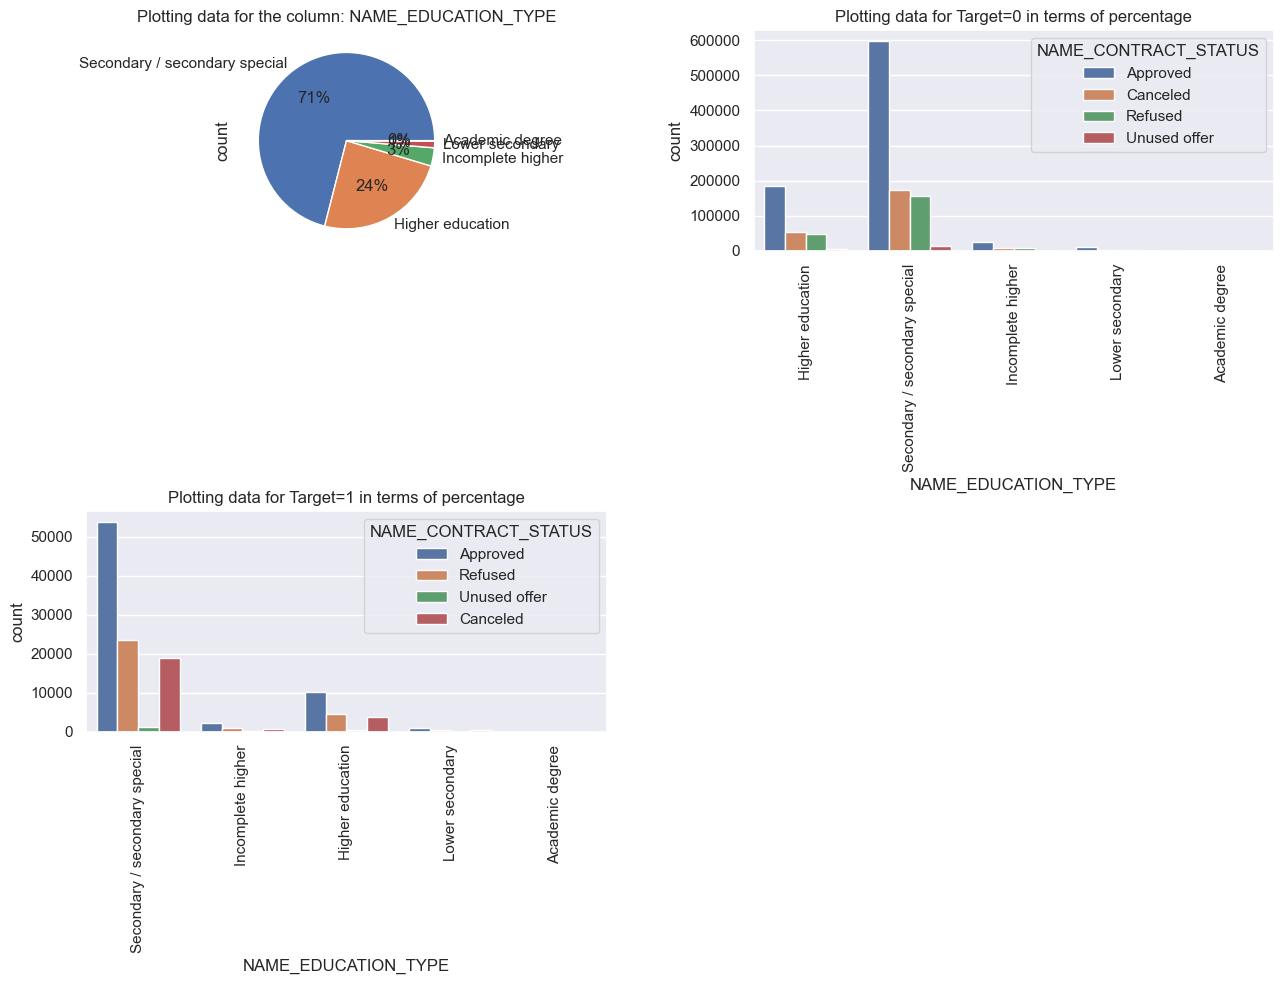

**********************************************************************************************************


In [63]:
# Plotting for "NAME_EDUCATION_TYPE" column.
plotting('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')